<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Sector-51" data-toc-modified-id="1.-Sector-51-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Sector 51</a></span><ul class="toc-item"><li><span><a href="#1.0.-Loading-the-data" data-toc-modified-id="1.0.-Loading-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1.0. Loading the data</a></span></li><li><span><a href="#1.1.-Stationarity" data-toc-modified-id="1.1.-Stationarity-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>1.1. Stationarity</a></span><ul class="toc-item"><li><span><a href="#ADF-test" data-toc-modified-id="ADF-test-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>ADF test</a></span></li></ul></li><li><span><a href="#1.2-ACF-&amp;-PACF" data-toc-modified-id="1.2-ACF-&amp;-PACF-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>1.2 ACF &amp; PACF</a></span></li><li><span><a href="#1.3-Modelling" data-toc-modified-id="1.3-Modelling-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>1.3 Modelling</a></span><ul class="toc-item"><li><span><a href="#1.3.1-ARIMA-1,-0,-1-rolling" data-toc-modified-id="1.3.1-ARIMA-1,-0,-1-rolling-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>1.3.1 ARIMA 1, 0, 1 rolling</a></span></li><li><span><a href="#1.3.2-ARIMA-1,-0,-1-without-rolling" data-toc-modified-id="1.3.2-ARIMA-1,-0,-1-without-rolling-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>1.3.2 ARIMA 1, 0, 1 without rolling</a></span></li><li><span><a href="#1.3.2.2-ARIMA-1,-0,-4-without-rolling" data-toc-modified-id="1.3.2.2-ARIMA-1,-0,-4-without-rolling-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>1.3.2.2 ARIMA 1, 0, 4 without rolling</a></span></li><li><span><a href="#1.3.3-ARIMA-1,-1,-1-rolling" data-toc-modified-id="1.3.3-ARIMA-1,-1,-1-rolling-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>1.3.3 ARIMA 1, 1, 1 rolling</a></span><ul class="toc-item"><li><span><a href="#1.3.3.2-Another-way" data-toc-modified-id="1.3.3.2-Another-way-1.4.4.1"><span class="toc-item-num">1.4.4.1&nbsp;&nbsp;</span>1.3.3.2 Another way</a></span></li></ul></li><li><span><a href="#365-diff-with-rolling" data-toc-modified-id="365-diff-with-rolling-1.4.5"><span class="toc-item-num">1.4.5&nbsp;&nbsp;</span>365 diff with rolling</a></span></li><li><span><a href="#365-days-diff-without-rolling" data-toc-modified-id="365-days-diff-without-rolling-1.4.6"><span class="toc-item-num">1.4.6&nbsp;&nbsp;</span>365 days diff without rolling</a></span></li><li><span><a href="#1.3.4-ARIMA-1,1,1-without-rolling" data-toc-modified-id="1.3.4-ARIMA-1,1,1-without-rolling-1.4.7"><span class="toc-item-num">1.4.7&nbsp;&nbsp;</span>1.3.4 ARIMA 1,1,1 without rolling</a></span><ul class="toc-item"><li><span><a href="#1.3.4.1-Another-way" data-toc-modified-id="1.3.4.1-Another-way-1.4.7.1"><span class="toc-item-num">1.4.7.1&nbsp;&nbsp;</span>1.3.4.1 Another way</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#1" data-toc-modified-id="1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>1</a></span></li></ul></div>

In [1]:
# Data analysis
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 

# Time Series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
import statsmodels.api as sm

# For printing multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Visualization parameters
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_format = 'retina'

In [2]:
results = pd.DataFrame(columns=["p,d,q", "MSE", "Rolling?", "AIC"])

In [3]:
results

Empty DataFrame
Columns: [p,d,q, MSE, Rolling?, AIC]
Index: []

# 1. Sector 51

## 1.0. Loading the data

In [11]:
sector_51 = pd.read_csv("sector_51_copy.csv")
sector_51

From Date   PM2.5  PM2.5_SubIndex    PM10  PM10_SubIndex     NO    NO2  \
0     2020-03-05   36.51       60.850000   73.15      73.150000   5.91  24.28   
1     2020-03-06   22.23       37.050000   39.15      39.150000   5.89  23.24   
2     2020-03-07   41.44       69.066667   77.68      77.680000   8.54  21.67   
3     2020-03-08   62.64      108.800000  130.39     120.260000  18.77  24.16   
4     2020-03-09   83.74      179.133333  127.54     118.360000   4.88  22.10   
...          ...     ...             ...     ...            ...    ...    ...   
1354  2023-11-19  149.81      322.930769  234.32     189.546667  16.35  15.63   
1355  2023-11-20  177.53      344.253846  321.96     271.960000  15.10  11.77   
1356  2023-11-21  150.27      323.284615  222.25     181.500000  15.10  11.78   
1357  2023-11-22  173.00      340.769231  281.50     231.500000  15.10  11.77   
1358  2023-11-23  256.99      405.376923  803.59     866.987500  15.99  14.23   

        NOx  NOx_SubIndex    CO  CO_SubIndex  Ozone  Ozone_SubIndex  Checks  \
0     30.19       37.7375  0.51       25.500  71.07           71.07       5   
1     29.12       36.4000  0.45       22.500  55.32           55.32       5   
2     30.20       37.7500  0.63       31.500  46.15           46.15       5   
3     42.94       53.6750  0.86       43.000  41.67           41.67       5   
4     26.98       33.7250  0.68       34.000  49.61           49.61       5   
...     ...           ...   ...          ...    ...             ...     ...   
1354  20.79       25.9875  1.87       93.500  10.31           10.31       5   
1355  19.21       24.0125  2.51      106.375  34.88           34.88       5   
1356  19.21       24.0125  2.27      103.375  49.94           49.94       5   
1357  19.21       24.0125  1.93       96.500  49.94           49.94       5   
1358  16.59       20.7375  5.10      138.750  34.88           34.88       5   

        AQI  
0      73.0  
1      55.0  
2      78.0  
3     120.0  
4     179.0  
...     ...  
1354  323.0  
1355  344.0  
1356  323.0  
1357  341.0  
1358  867.0  

[1359 rows x 15 columns]

In [14]:
sector_51.set_index('From Date', inplace=True)

In [19]:
sector_51

PM2.5  PM2.5_SubIndex    PM10  PM10_SubIndex     NO    NO2  \
From Date                                                                 
2020-03-05   36.51       60.850000   73.15      73.150000   5.91  24.28   
2020-03-06   22.23       37.050000   39.15      39.150000   5.89  23.24   
2020-03-07   41.44       69.066667   77.68      77.680000   8.54  21.67   
2020-03-08   62.64      108.800000  130.39     120.260000  18.77  24.16   
2020-03-09   83.74      179.133333  127.54     118.360000   4.88  22.10   
...            ...             ...     ...            ...    ...    ...   
2023-11-19  149.81      322.930769  234.32     189.546667  16.35  15.63   
2023-11-20  177.53      344.253846  321.96     271.960000  15.10  11.77   
2023-11-21  150.27      323.284615  222.25     181.500000  15.10  11.78   
2023-11-22  173.00      340.769231  281.50     231.500000  15.10  11.77   
2023-11-23  256.99      405.376923  803.59     866.987500  15.99  14.23   

              NOx  NOx_SubIndex    CO  CO_SubIndex  Ozone  Ozone_SubIndex  \
From Date                                                                   
2020-03-05  30.19       37.7375  0.51       25.500  71.07           71.07   
2020-03-06  29.12       36.4000  0.45       22.500  55.32           55.32   
2020-03-07  30.20       37.7500  0.63       31.500  46.15           46.15   
2020-03-08  42.94       53.6750  0.86       43.000  41.67           41.67   
2020-03-09  26.98       33.7250  0.68       34.000  49.61           49.61   
...           ...           ...   ...          ...    ...             ...   
2023-11-19  20.79       25.9875  1.87       93.500  10.31           10.31   
2023-11-20  19.21       24.0125  2.51      106.375  34.88           34.88   
2023-11-21  19.21       24.0125  2.27      103.375  49.94           49.94   
2023-11-22  19.21       24.0125  1.93       96.500  49.94           49.94   
2023-11-23  16.59       20.7375  5.10      138.750  34.88           34.88   

            Checks    AQI  
From Date                  
2020-03-05       5   73.0  
2020-03-06       5   55.0  
2020-03-07       5   78.0  
2020-03-08       5  120.0  
2020-03-09       5  179.0  
...            ...    ...  
2023-11-19       5  323.0  
2023-11-20       5  344.0  
2023-11-21       5  323.0  
2023-11-22       5  341.0  
2023-11-23       5  867.0  

[1359 rows x 14 columns]

In [20]:
sector_51.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 2020-03-05 to 2023-11-23
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PM2.5           1359 non-null   float64
 1   PM2.5_SubIndex  1359 non-null   float64
 2   PM10            1359 non-null   float64
 3   PM10_SubIndex   1359 non-null   float64
 4   NO              1359 non-null   float64
 5   NO2             1359 non-null   float64
 6   NOx             1359 non-null   float64
 7   NOx_SubIndex    1359 non-null   float64
 8   CO              1359 non-null   float64
 9   CO_SubIndex     1359 non-null   float64
 10  Ozone           1359 non-null   float64
 11  Ozone_SubIndex  1359 non-null   float64
 12  Checks          1359 non-null   int64  
 13  AQI             1359 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 159.3+ KB


In [22]:
sector_51.index = pd.to_datetime(sector_51.index)

In [24]:
sector_51

PM2.5  PM2.5_SubIndex    PM10  PM10_SubIndex     NO    NO2  \
From Date                                                                 
2020-03-05   36.51       60.850000   73.15      73.150000   5.91  24.28   
2020-03-06   22.23       37.050000   39.15      39.150000   5.89  23.24   
2020-03-07   41.44       69.066667   77.68      77.680000   8.54  21.67   
2020-03-08   62.64      108.800000  130.39     120.260000  18.77  24.16   
2020-03-09   83.74      179.133333  127.54     118.360000   4.88  22.10   
...            ...             ...     ...            ...    ...    ...   
2023-11-19  149.81      322.930769  234.32     189.546667  16.35  15.63   
2023-11-20  177.53      344.253846  321.96     271.960000  15.10  11.77   
2023-11-21  150.27      323.284615  222.25     181.500000  15.10  11.78   
2023-11-22  173.00      340.769231  281.50     231.500000  15.10  11.77   
2023-11-23  256.99      405.376923  803.59     866.987500  15.99  14.23   

              NOx  NOx_SubIndex    CO  CO_SubIndex  Ozone  Ozone_SubIndex  \
From Date                                                                   
2020-03-05  30.19       37.7375  0.51       25.500  71.07           71.07   
2020-03-06  29.12       36.4000  0.45       22.500  55.32           55.32   
2020-03-07  30.20       37.7500  0.63       31.500  46.15           46.15   
2020-03-08  42.94       53.6750  0.86       43.000  41.67           41.67   
2020-03-09  26.98       33.7250  0.68       34.000  49.61           49.61   
...           ...           ...   ...          ...    ...             ...   
2023-11-19  20.79       25.9875  1.87       93.500  10.31           10.31   
2023-11-20  19.21       24.0125  2.51      106.375  34.88           34.88   
2023-11-21  19.21       24.0125  2.27      103.375  49.94           49.94   
2023-11-22  19.21       24.0125  1.93       96.500  49.94           49.94   
2023-11-23  16.59       20.7375  5.10      138.750  34.88           34.88   

            Checks    AQI  
From Date                  
2020-03-05       5   73.0  
2020-03-06       5   55.0  
2020-03-07       5   78.0  
2020-03-08       5  120.0  
2020-03-09       5  179.0  
...            ...    ...  
2023-11-19       5  323.0  
2023-11-20       5  344.0  
2023-11-21       5  323.0  
2023-11-22       5  341.0  
2023-11-23       5  867.0  

[1359 rows x 14 columns]

## 1.1. Stationarity

### ADF test

In [30]:
from statsmodels.tsa.stattools import adfuller

In [31]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print("# lags used", result[2])
    print("critical values", result[4]) 

In [32]:
perform_adf_test(sector_51['AQI'])

ADF Statistic: -2.878924
p-value: 0.047854
# lags used 18
critical values {'1%': -3.4352394560472033, '5%': -2.863699314925706, '10%': -2.567919624081087}


- It is <0.05, so it is stationary

<Figure size 2000x800 with 0 Axes>

<AxesSubplot: xlabel='From Date', ylabel='AQI'>

Text(0.5, 1.0, 'Sector 51 AQI 2020 - 2023')

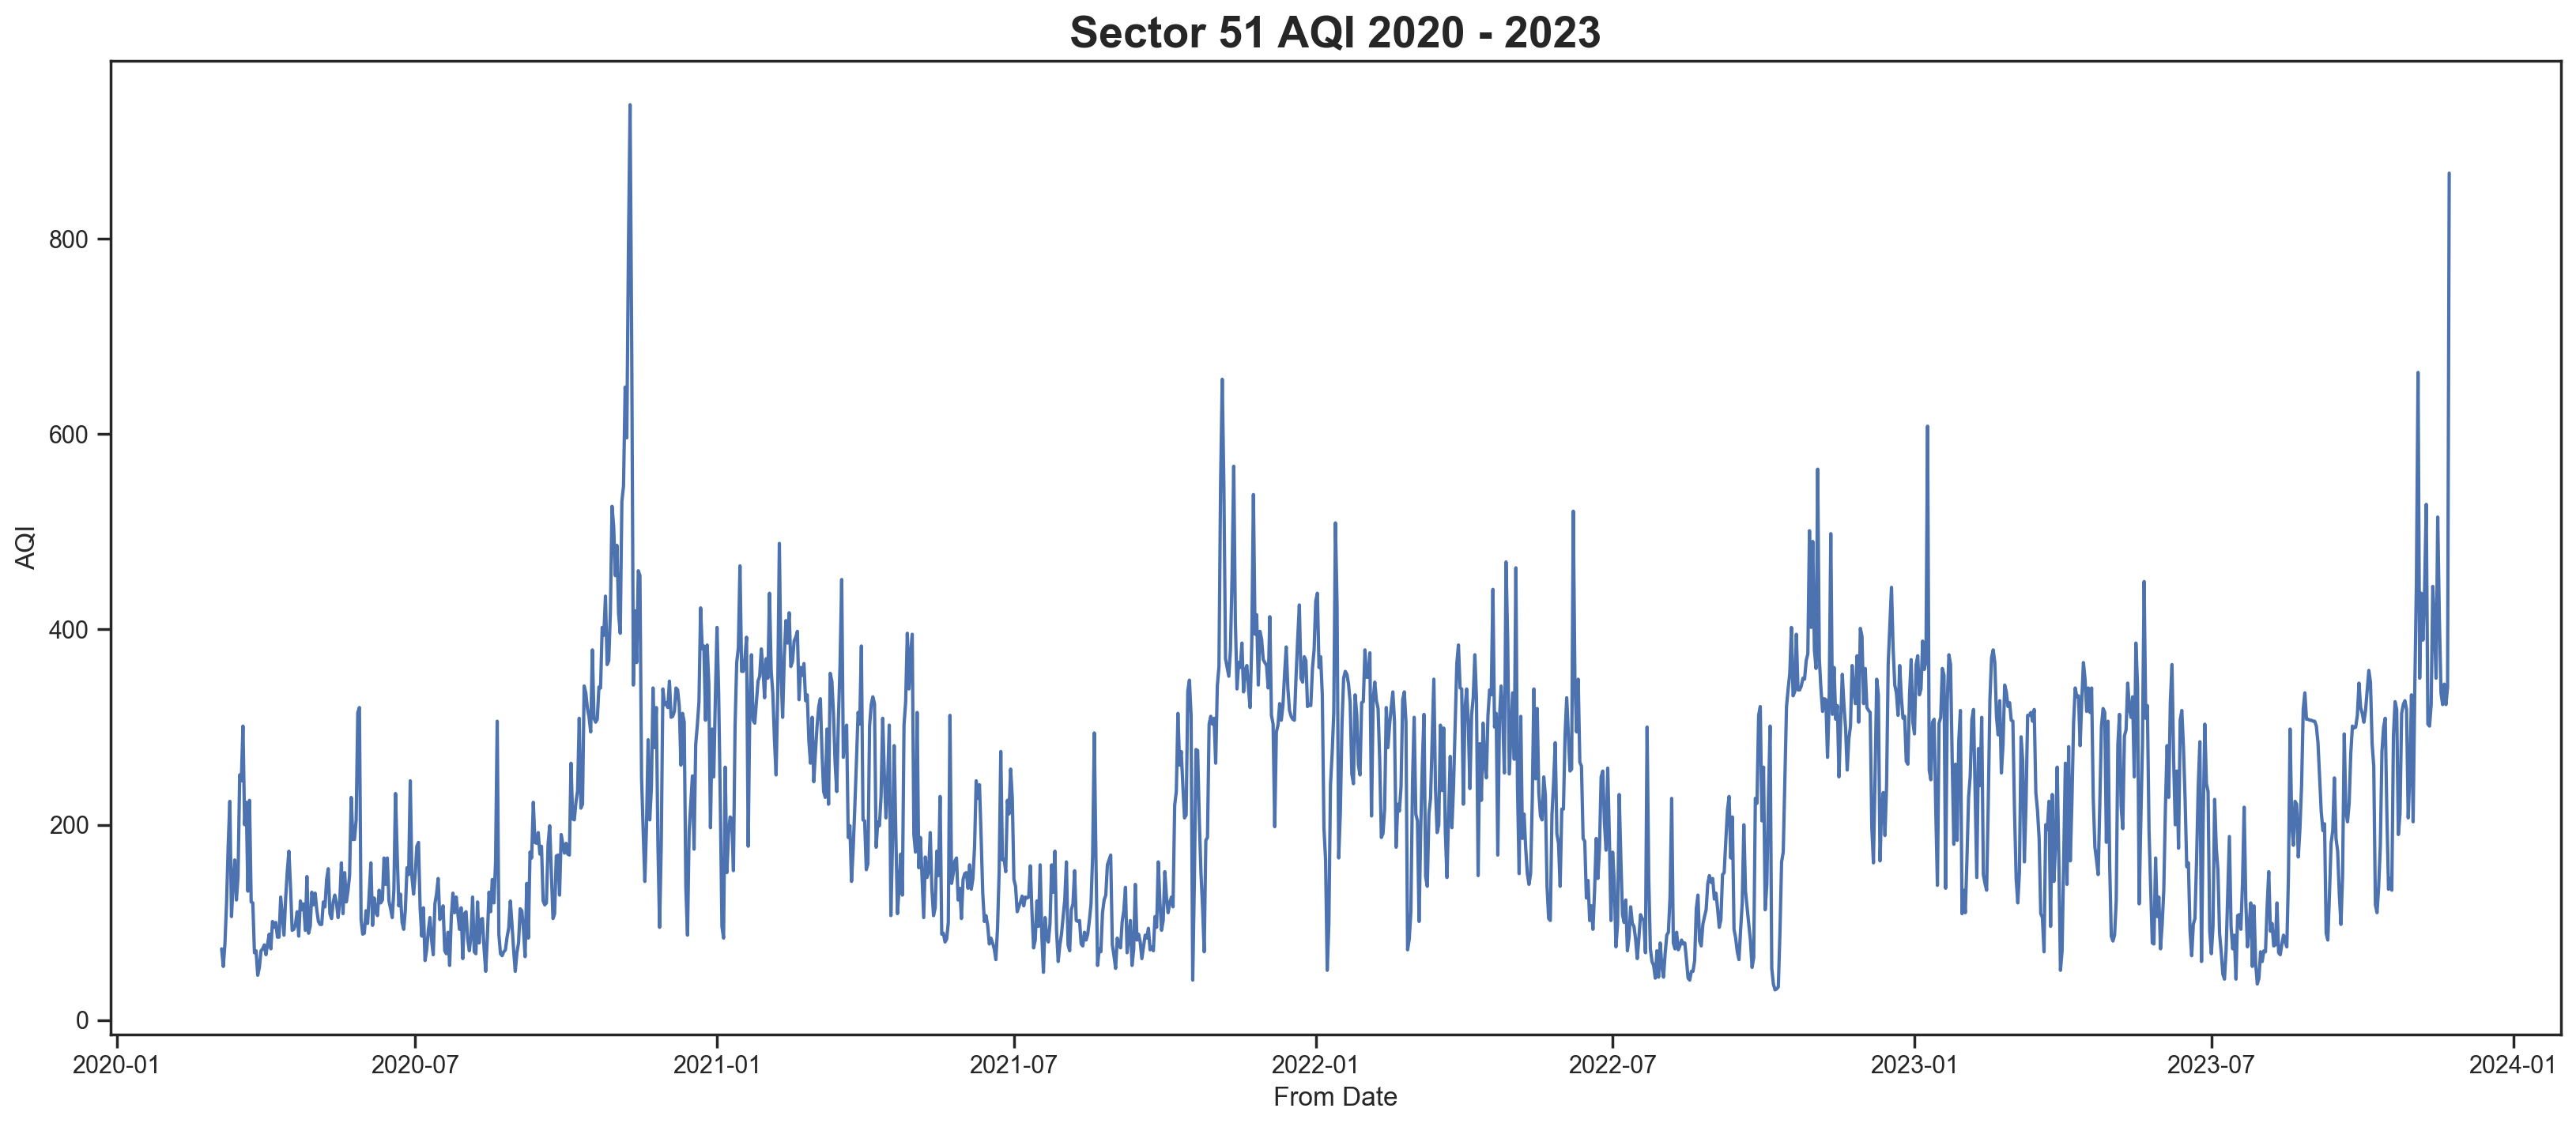

In [34]:
plt.figure(figsize=(20,8))
sns.lineplot(data = sector_51['AQI'], errorbar=None)
plt.title('Sector 51 AQI 2020 - 2023', fontdict= {"fontsize": 20, "fontweight": "bold"})

<Figure size 2000x800 with 0 Axes>

<AxesSubplot: xlabel='From Date', ylabel='AQI'>

Text(0.5, 1.0, 'Sector 51 AQI 2020 - 2023 first difference')

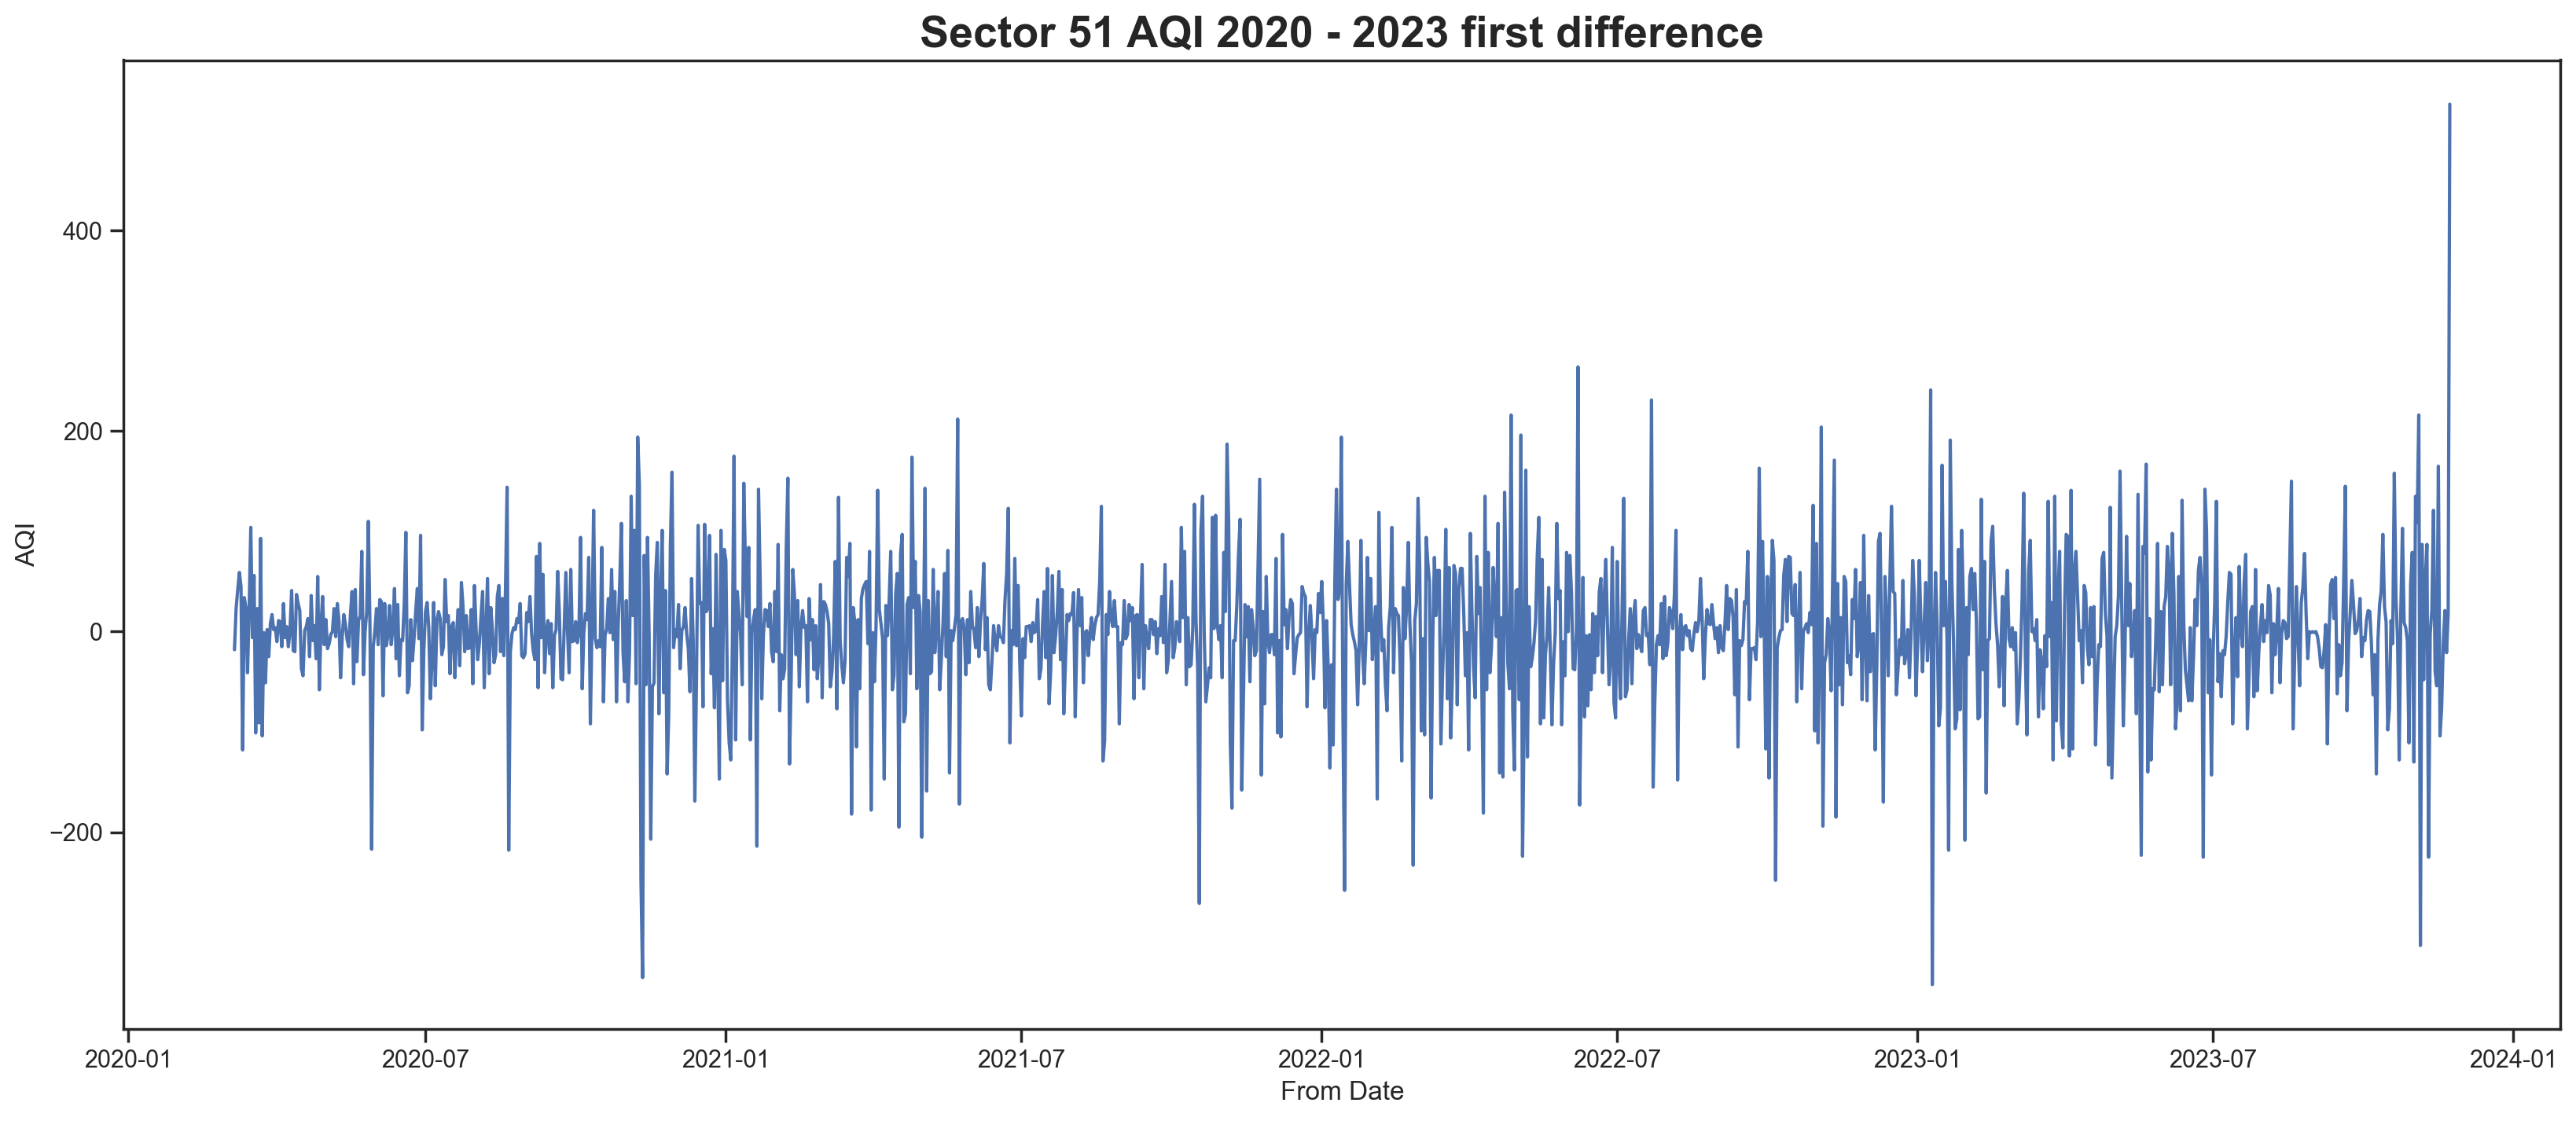

In [185]:
plt.figure(figsize=(20,8))
sns.lineplot(data = sector_51['AQI'].diff(1), errorbar=None)
plt.title('Sector 51 AQI 2020 - 2023 first difference', fontdict= {"fontsize": 20, "fontweight": "bold"})

<Figure size 2000x800 with 0 Axes>

<AxesSubplot: xlabel='From Date', ylabel='AQI'>

Text(0.5, 1.0, 'Sector 51 AQI 2020 - 2023 yearly difference')

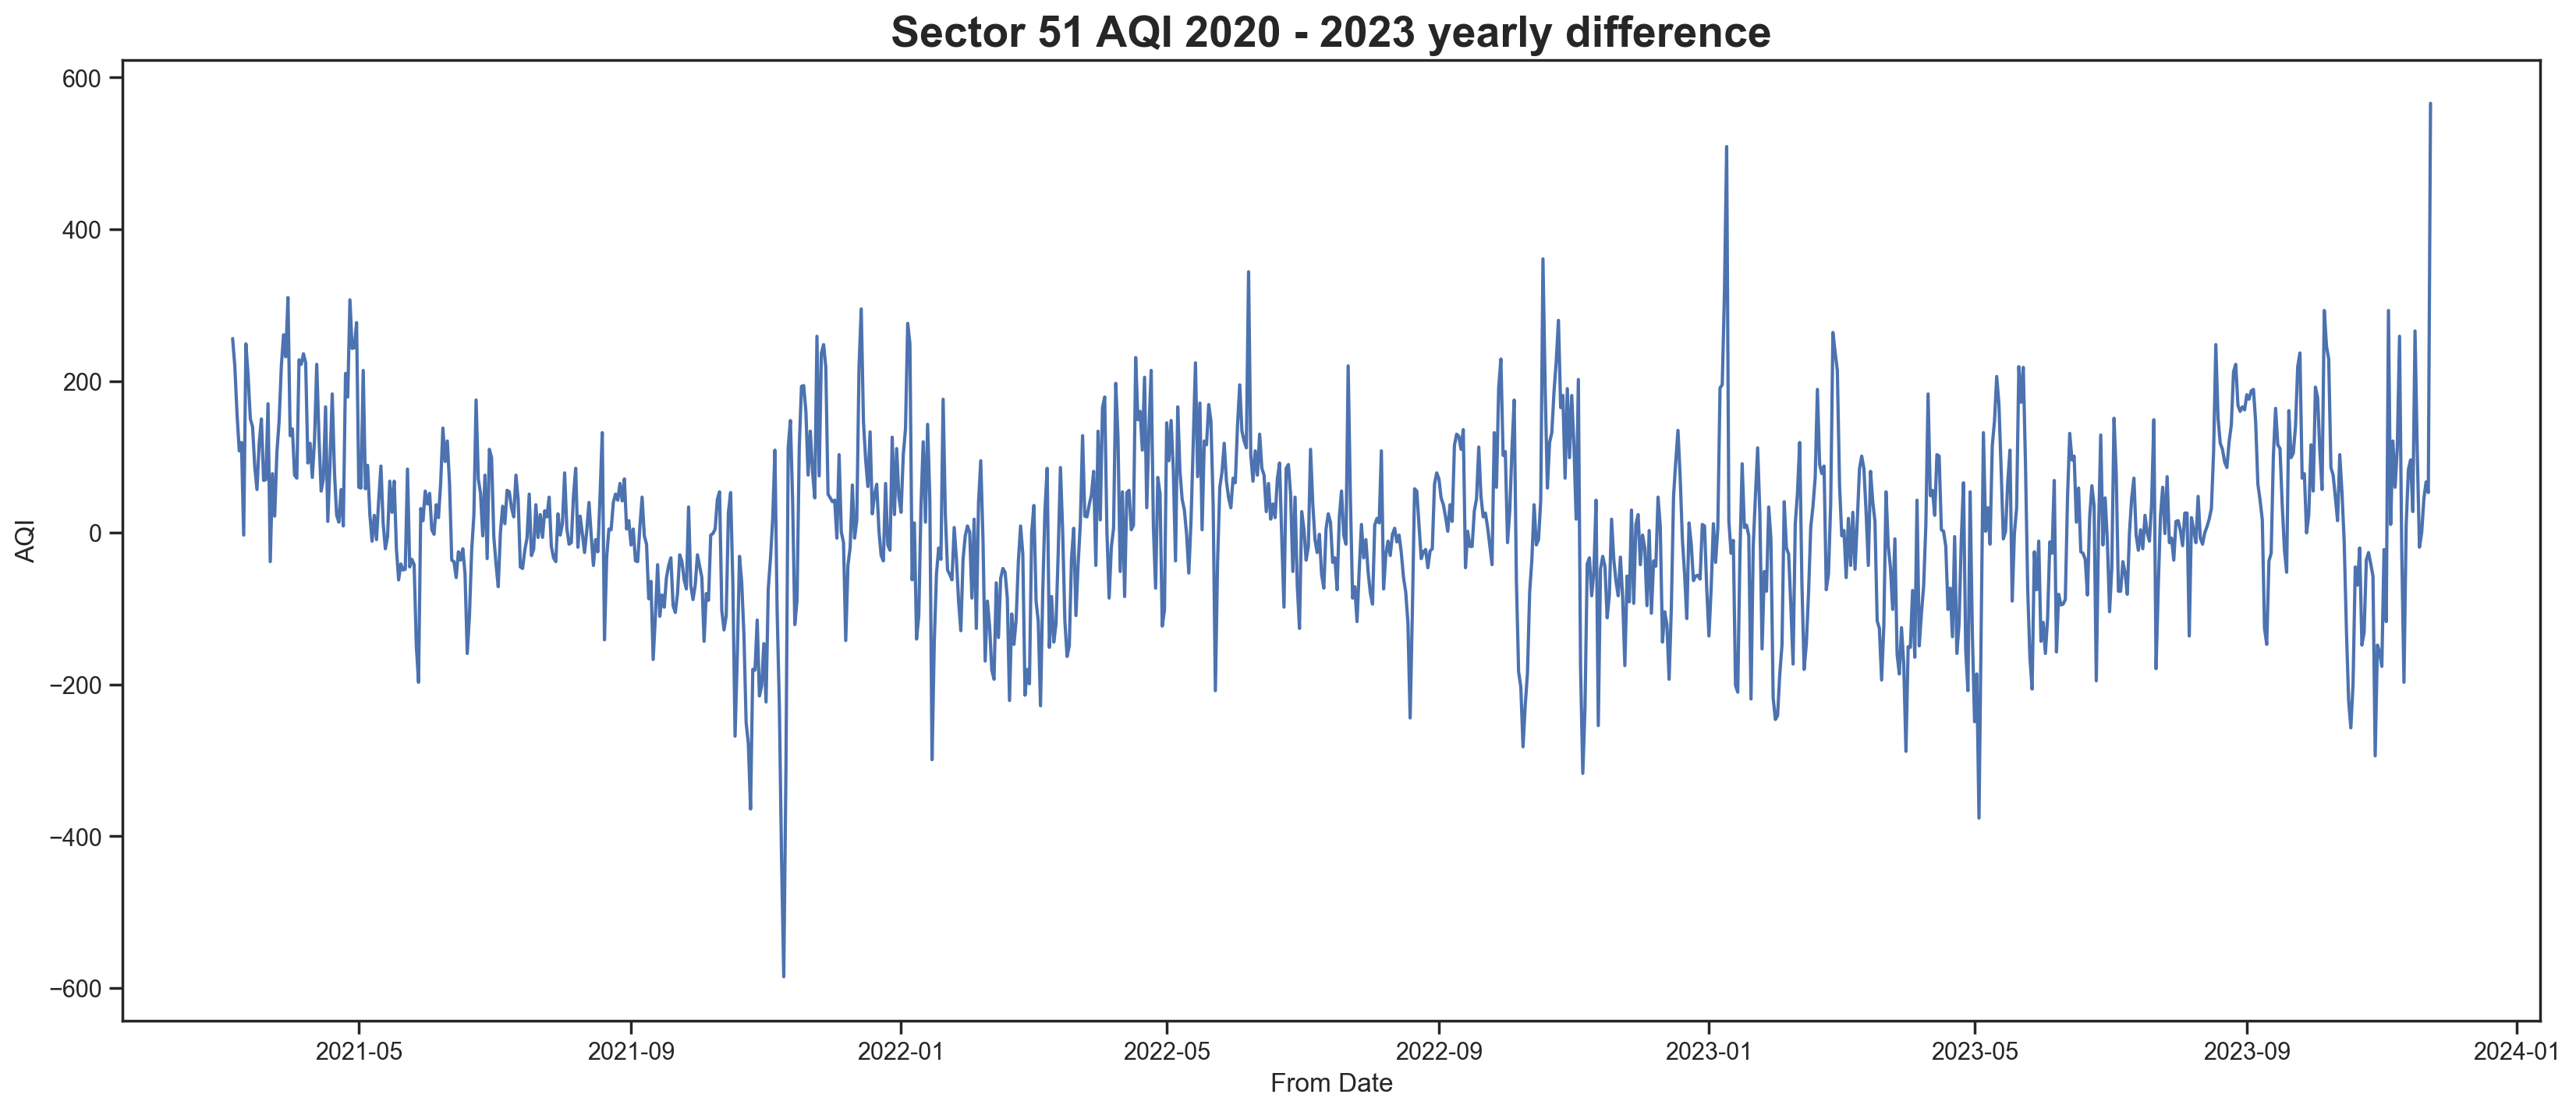

In [186]:
plt.figure(figsize=(20,8))
sns.lineplot(data = sector_51['AQI'].diff(365), errorbar=None)
plt.title('Sector 51 AQI 2020 - 2023 yearly difference', fontdict= {"fontsize": 20, "fontweight": "bold"})

In [187]:
perform_adf_test(sector_51['AQI'].diff(1).dropna())

ADF Statistic: -12.677377
p-value: 0.000000
# lags used 17
critical values {'1%': -3.4352394560472033, '5%': -2.863699314925706, '10%': -2.567919624081087}


In [188]:
perform_adf_test(sector_51['AQI'].diff(365).dropna())

ADF Statistic: -7.001241
p-value: 0.000000
# lags used 7
critical values {'1%': -3.4369994990319355, '5%': -2.8644757356011743, '10%': -2.5683331327427803}


## 1.2 ACF & PACF

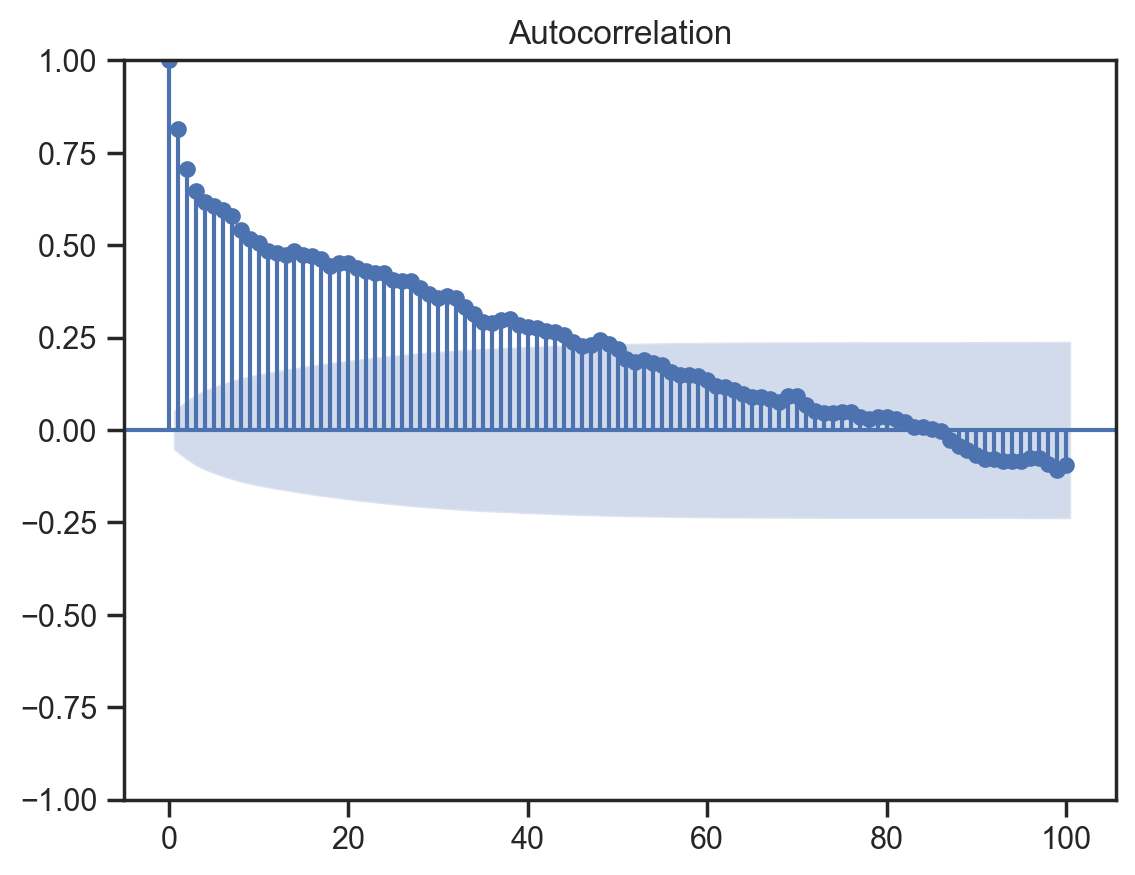

In [16]:
acf_plot = plot_acf(sector_51['AQI'], lags= 100)

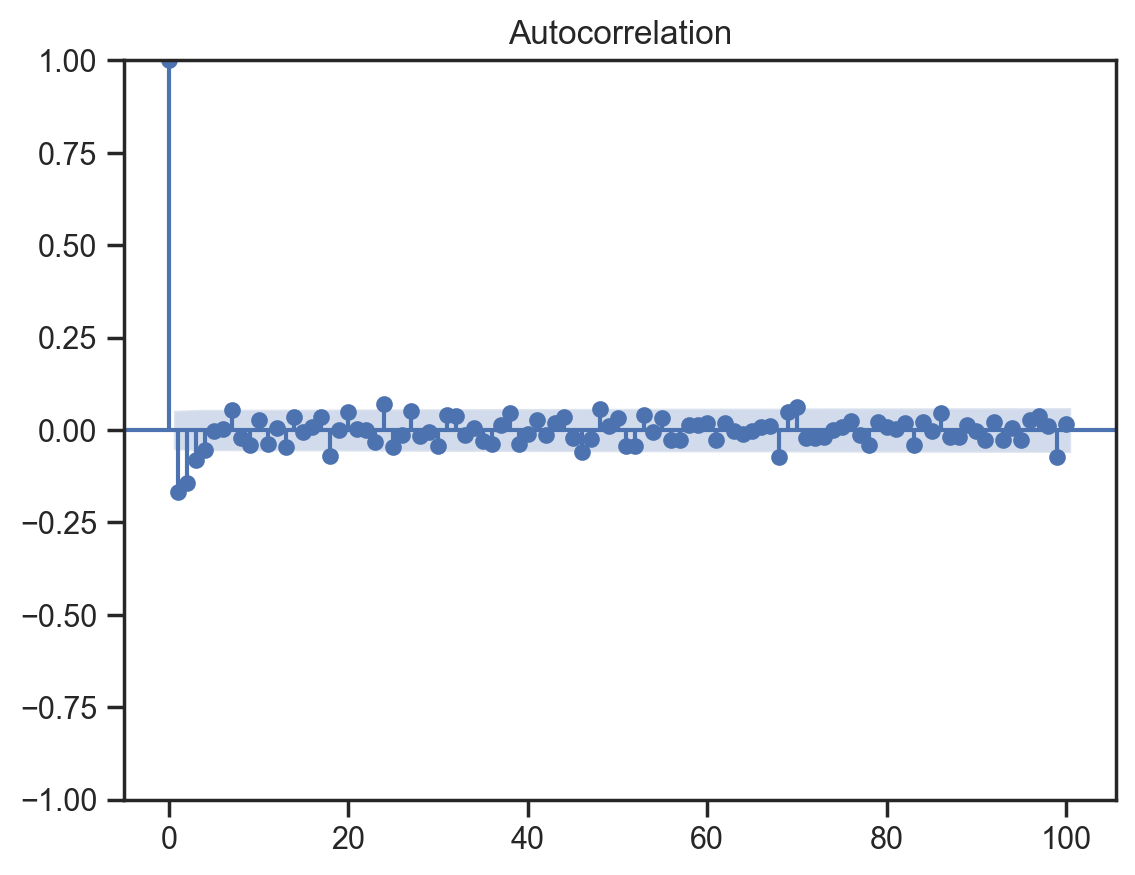

In [38]:
acf_plot = plot_acf(sector_51['AQI'].diff(1).dropna(), lags= 100)

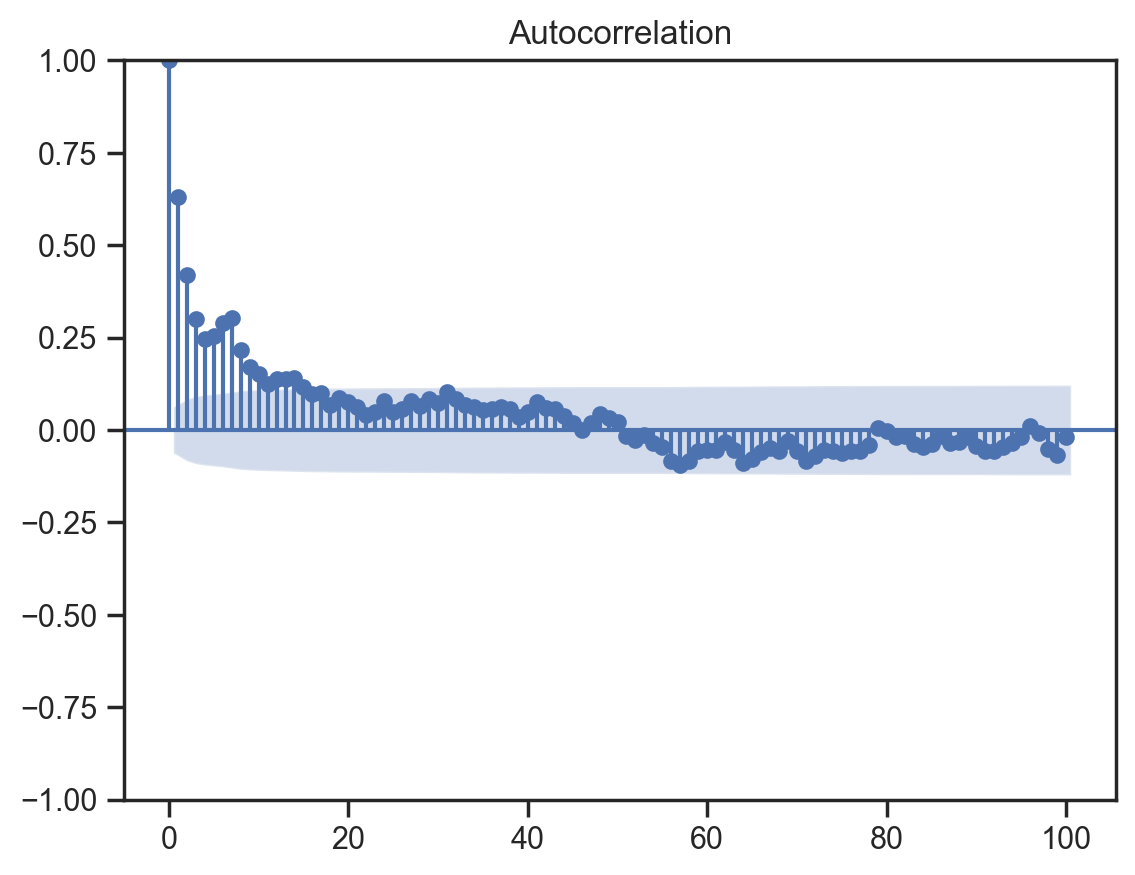

In [183]:
acf_plot = plot_acf(sector_51['AQI'].diff(365).dropna(), lags= 100)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


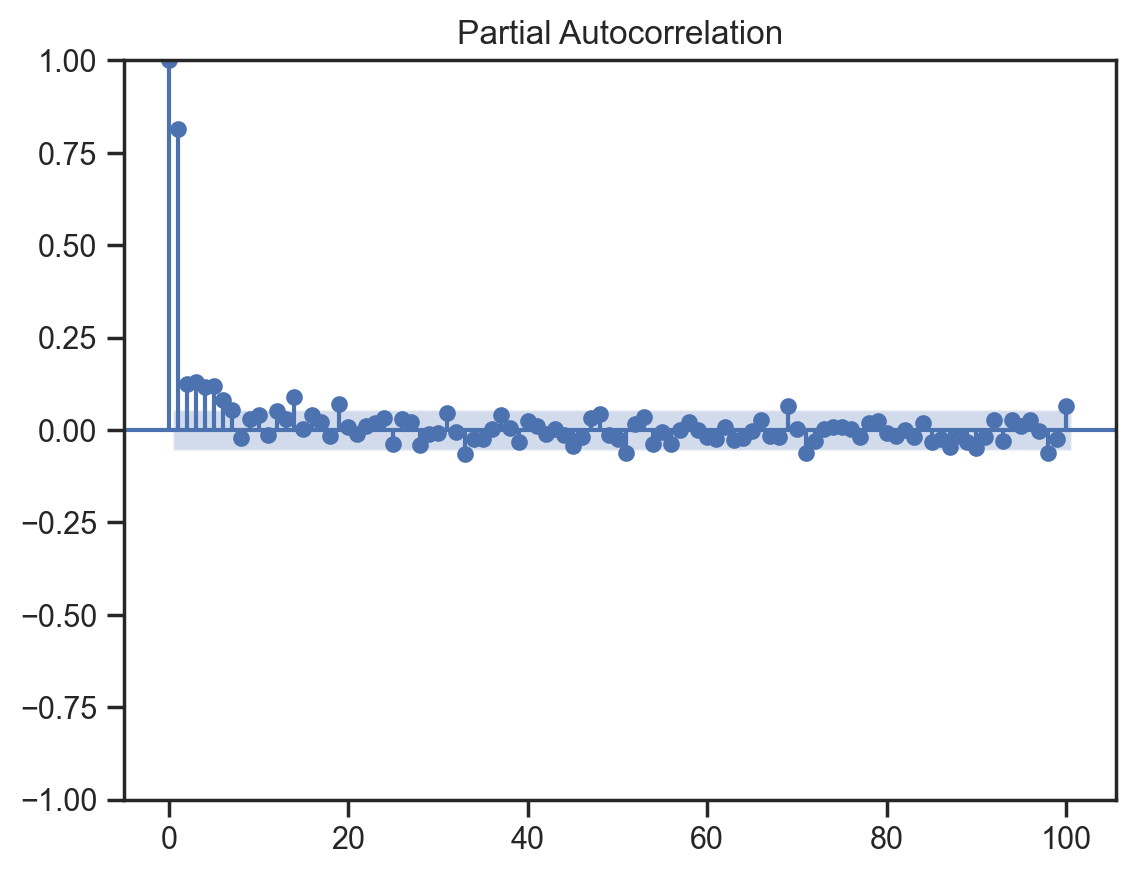

In [17]:
pacf_plot = plot_pacf(sector_51['AQI'], lags= 100)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


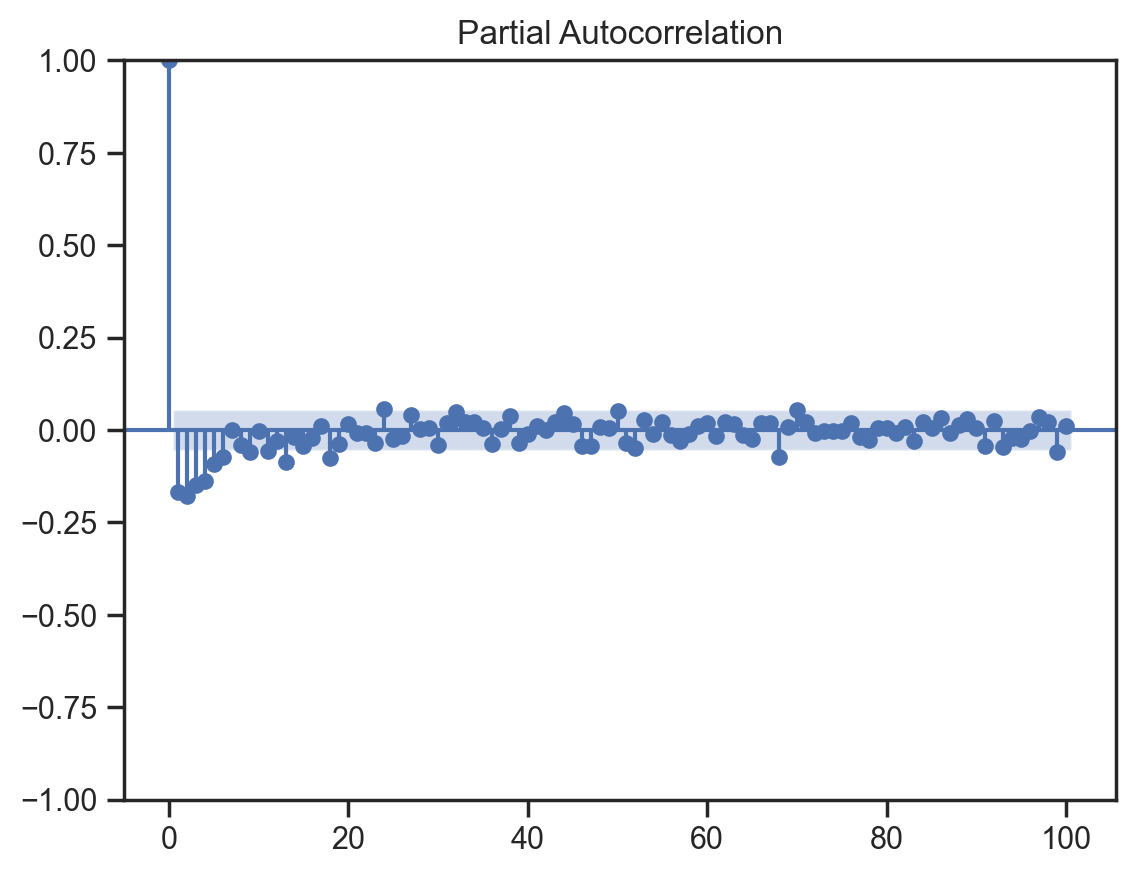

In [39]:
pacf_plot = plot_pacf(sector_51['AQI'].diff(1).dropna(), lags= 100)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


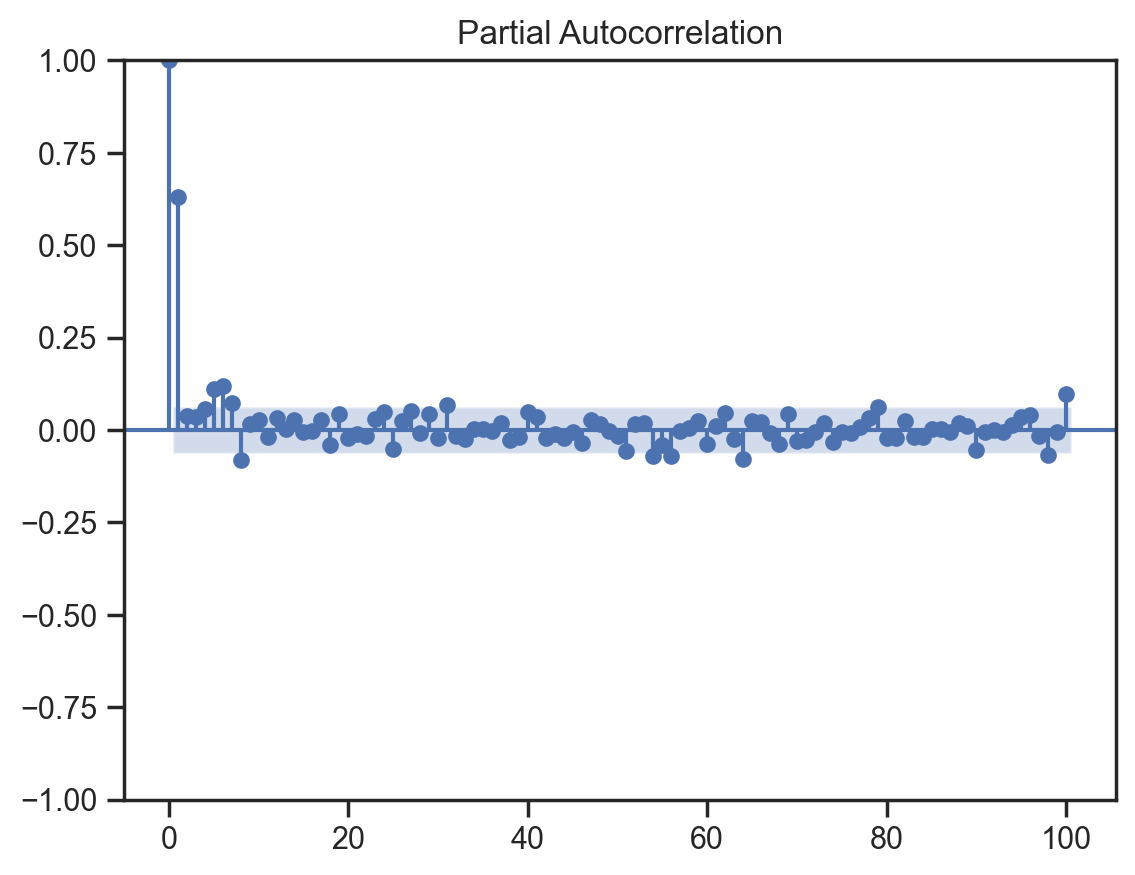

In [184]:
pacf_plot = plot_pacf(sector_51['AQI'].diff(365).dropna(), lags= 100)

In [40]:
import statsmodels.api as sm

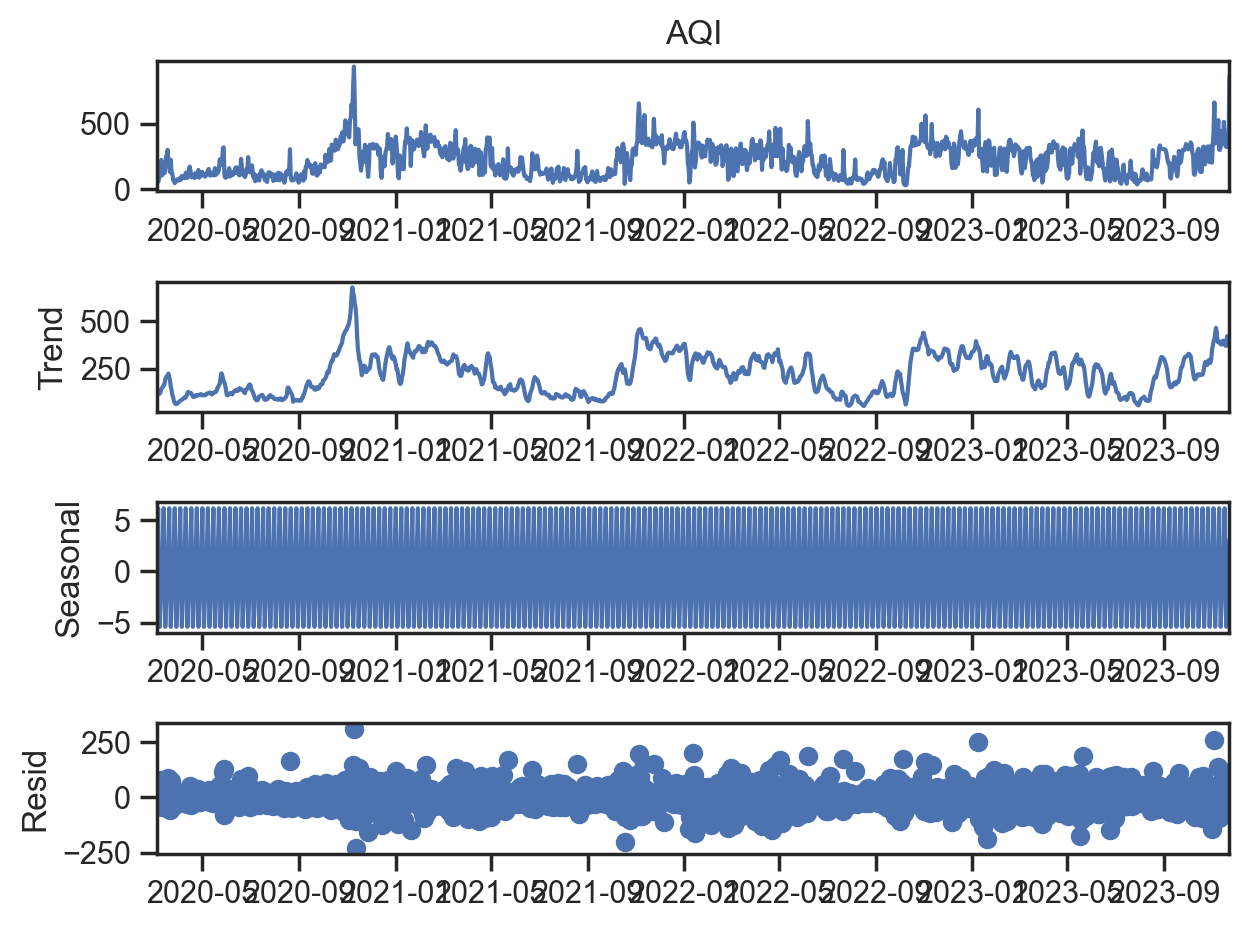

In [41]:
decomp = sm.tsa.seasonal_decompose(sector_51['AQI'])
_ = decomp.plot()

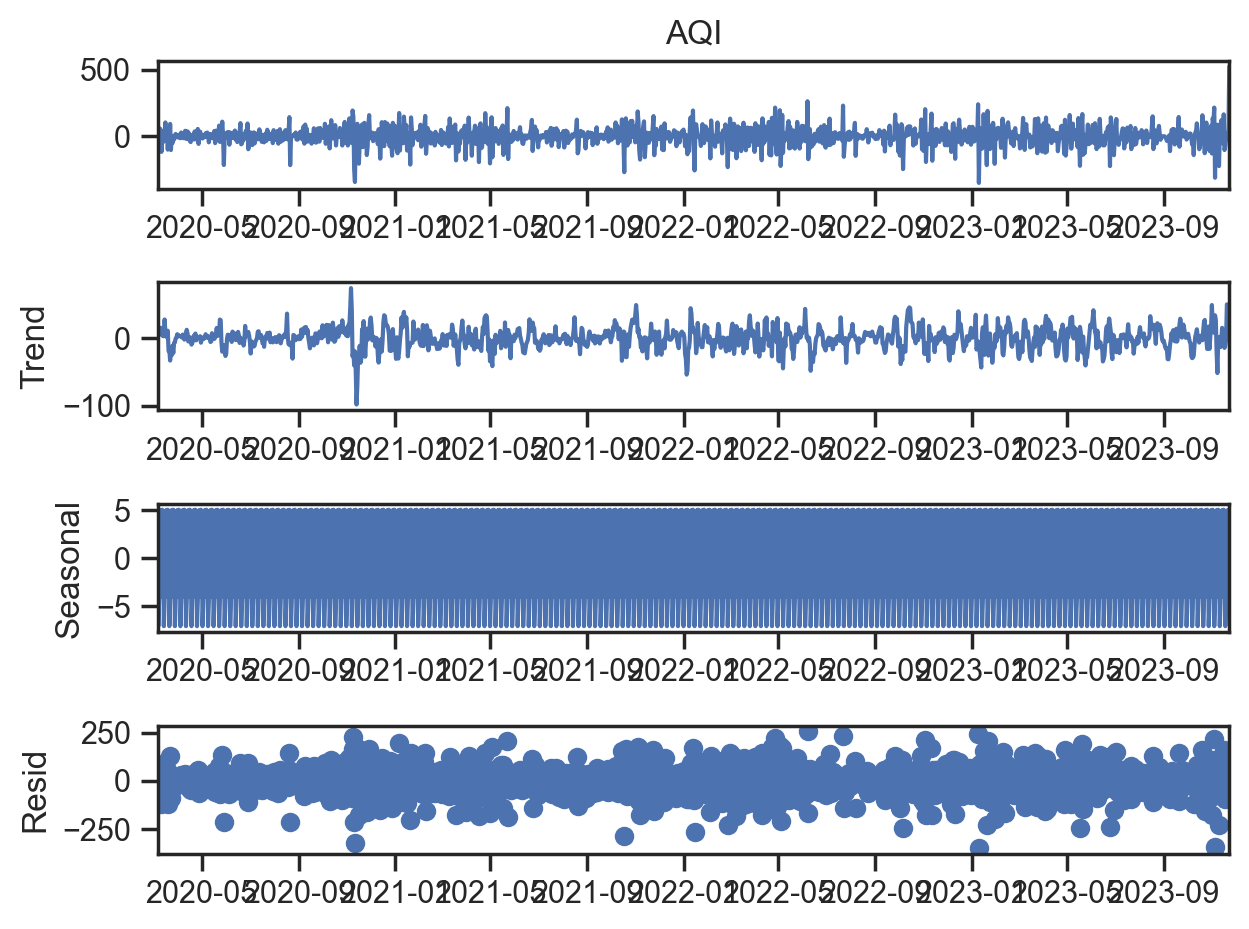

In [42]:
decomp = sm.tsa.seasonal_decompose(sector_51['AQI'].diff(1).dropna())
_ = decomp.plot()

## 1.3 Modelling

### 1.3.1 ARIMA 1, 0, 1 rolling

In [176]:
train_end = datetime(2023, 10, 23)
test_end = datetime(2023, 11, 22)

train_data = sector_51[:train_end]['AQI']
test_data = sector_51[train_end + timedelta(days=1):test_end]['AQI']

my_order = (1, 0, 1)
p,d,q = my_order
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    print("train_end-timedelta(days=1)", train_end - timedelta(days=1))
    train_data = sector_51[:train_end - timedelta(days=1)]['AQI']
    model = ARIMA(train_data, order=my_order)
    model_fit = model.fit()
    pred = model_fit.forecast(typ='levels')
    print("pred", pred)
    rolling_predictions[train_end] = pred

train_end-timedelta(days=1) 2023-10-23 00:00:00
pred 2023-10-24    212.320712
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-24 00:00:00
pred 2023-10-25    212.089095
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-25 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-10-26    285.53652
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-26 00:00:00
pred 2023-10-27    304.327342
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-27 00:00:00
pred 2023-10-28    310.32128
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-28 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-10-29    304.897583
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-29 00:00:00
pred 2023-10-30    224.585249
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-30 00:00:00
pred 2023-10-31    244.892622
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-31 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-01    304.689613
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-01 00:00:00
pred 2023-11-02    222.039719
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-02 00:00:00
pred 2023-11-03    303.89035
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-03 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-04    395.852931
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-04 00:00:00
pred 2023-11-05    568.275752
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-05 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-06    371.629519
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-06 00:00:00
pred 2023-11-07    400.161389
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-07 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-08    371.2304
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-08 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-09    402.812856
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-09 00:00:00
pred 2023-11-10    470.132316
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-10 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-11    324.020676
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-11 00:00:00
pred 2023-11-12    295.732486
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-12 00:00:00
pred 2023-11-13    306.082872
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-13 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-14    392.832569
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-14 00:00:00
pred 2023-11-15    380.808487
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-15 00:00:00
pred 2023-11-16    340.687328
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-16 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-17    448.936651
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-17 00:00:00
pred 2023-11-18    396.620014
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-18 00:00:00
pred 2023-11-19    333.507419
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-19 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-20    313.295571
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-20 00:00:00
pred 2023-11-21    324.210765
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-21 00:00:00
pred 2023-11-22    311.615417
Freq: D, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

In [179]:
residuals = test_data - rolling_predictions.shift(-1)

<Figure size 1400x400 with 0 Axes>

Text(0.5, 1.0, 'Residuals from Rolling ARIMA 1, 0, 1')

Text(0, 0.5, 'Error')

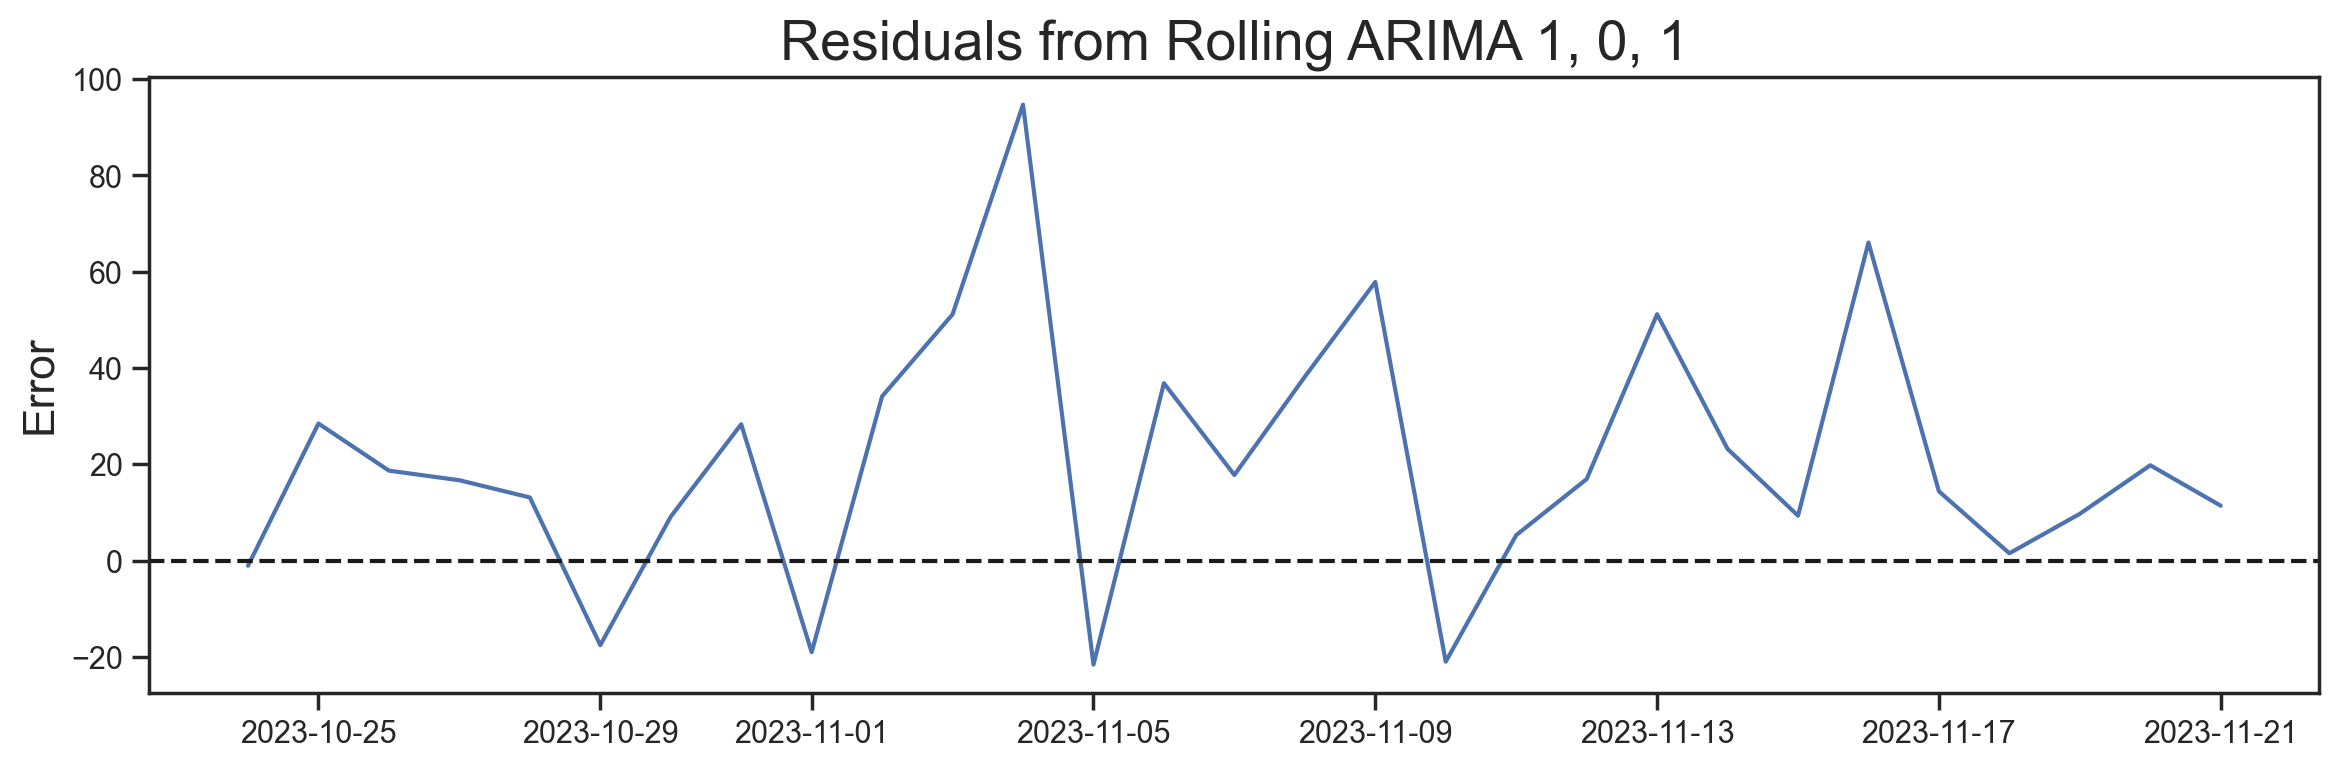

In [180]:
plt.figure(figsize=(14,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from Rolling ARIMA {}, {}, {}'.format(p,d,q), fontsize=20)
plt.ylabel('Error', fontsize=16)

In [181]:
result = {
    "p,d,q": ','.join(map(str, (p,d,q))),
    "MSE": np.sqrt(np.mean(residuals**2)),
    "Rolling?": True,
    "AIC": model_fit.aic
}

In [160]:
','.join(map(str, (p,d,q)))

'111'

'1,0,1'

In [182]:
pd.DataFrame(result, index=[0,1,2,3])

p,d,q        MSE  Rolling?           AIC
0  1,0,1  33.245736      True  15212.668332
1  1,0,1  33.245736      True  15212.668332
2  1,0,1  33.245736      True  15212.668332
3  1,0,1  33.245736      True  15212.668332

In [164]:
results = pd.concat([pd.DataFrame(result), results], ignore_index=True)

type: If using all scalar values, you must pass an index

In [147]:
results 

p,d,q        MSE Rolling?           AIC
0     1  33.245736     True  15212.668332
1     0  33.245736     True  15212.668332
2     1  33.245736     True  15212.668332

In [128]:
results.append?

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'ARIMA 1, 0, 1')

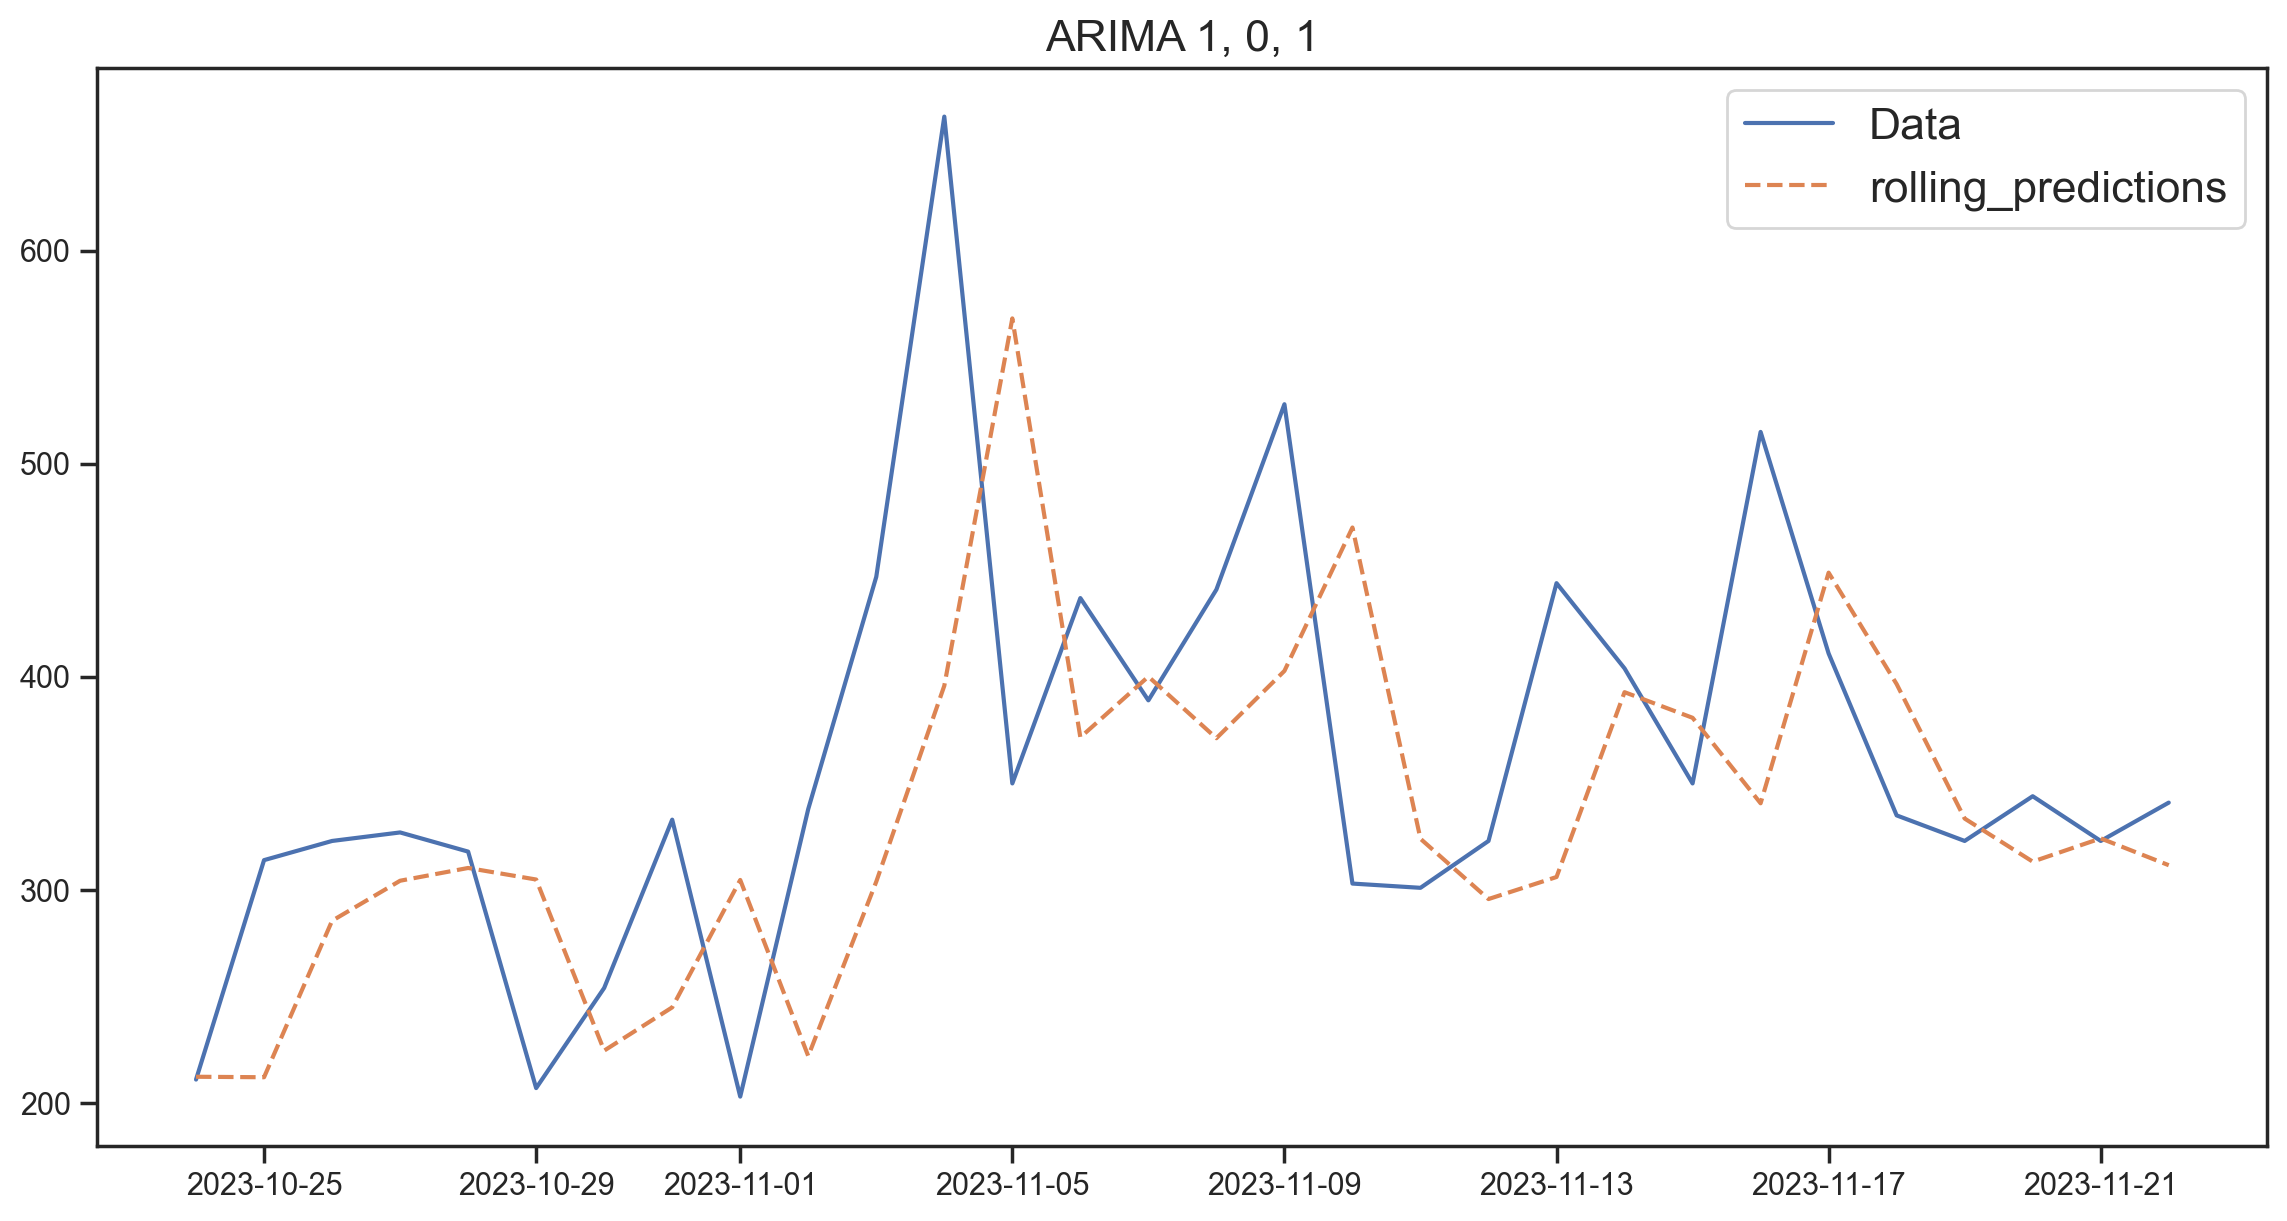

In [177]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions, '--')
plt.legend(('Data', 'rolling_predictions'), fontsize=16)
plt.title("ARIMA {}, {}, {}".format(p,d,q), fontsize=16)

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Shifted -1 predictions ARIMA 1, 0, 1 ')

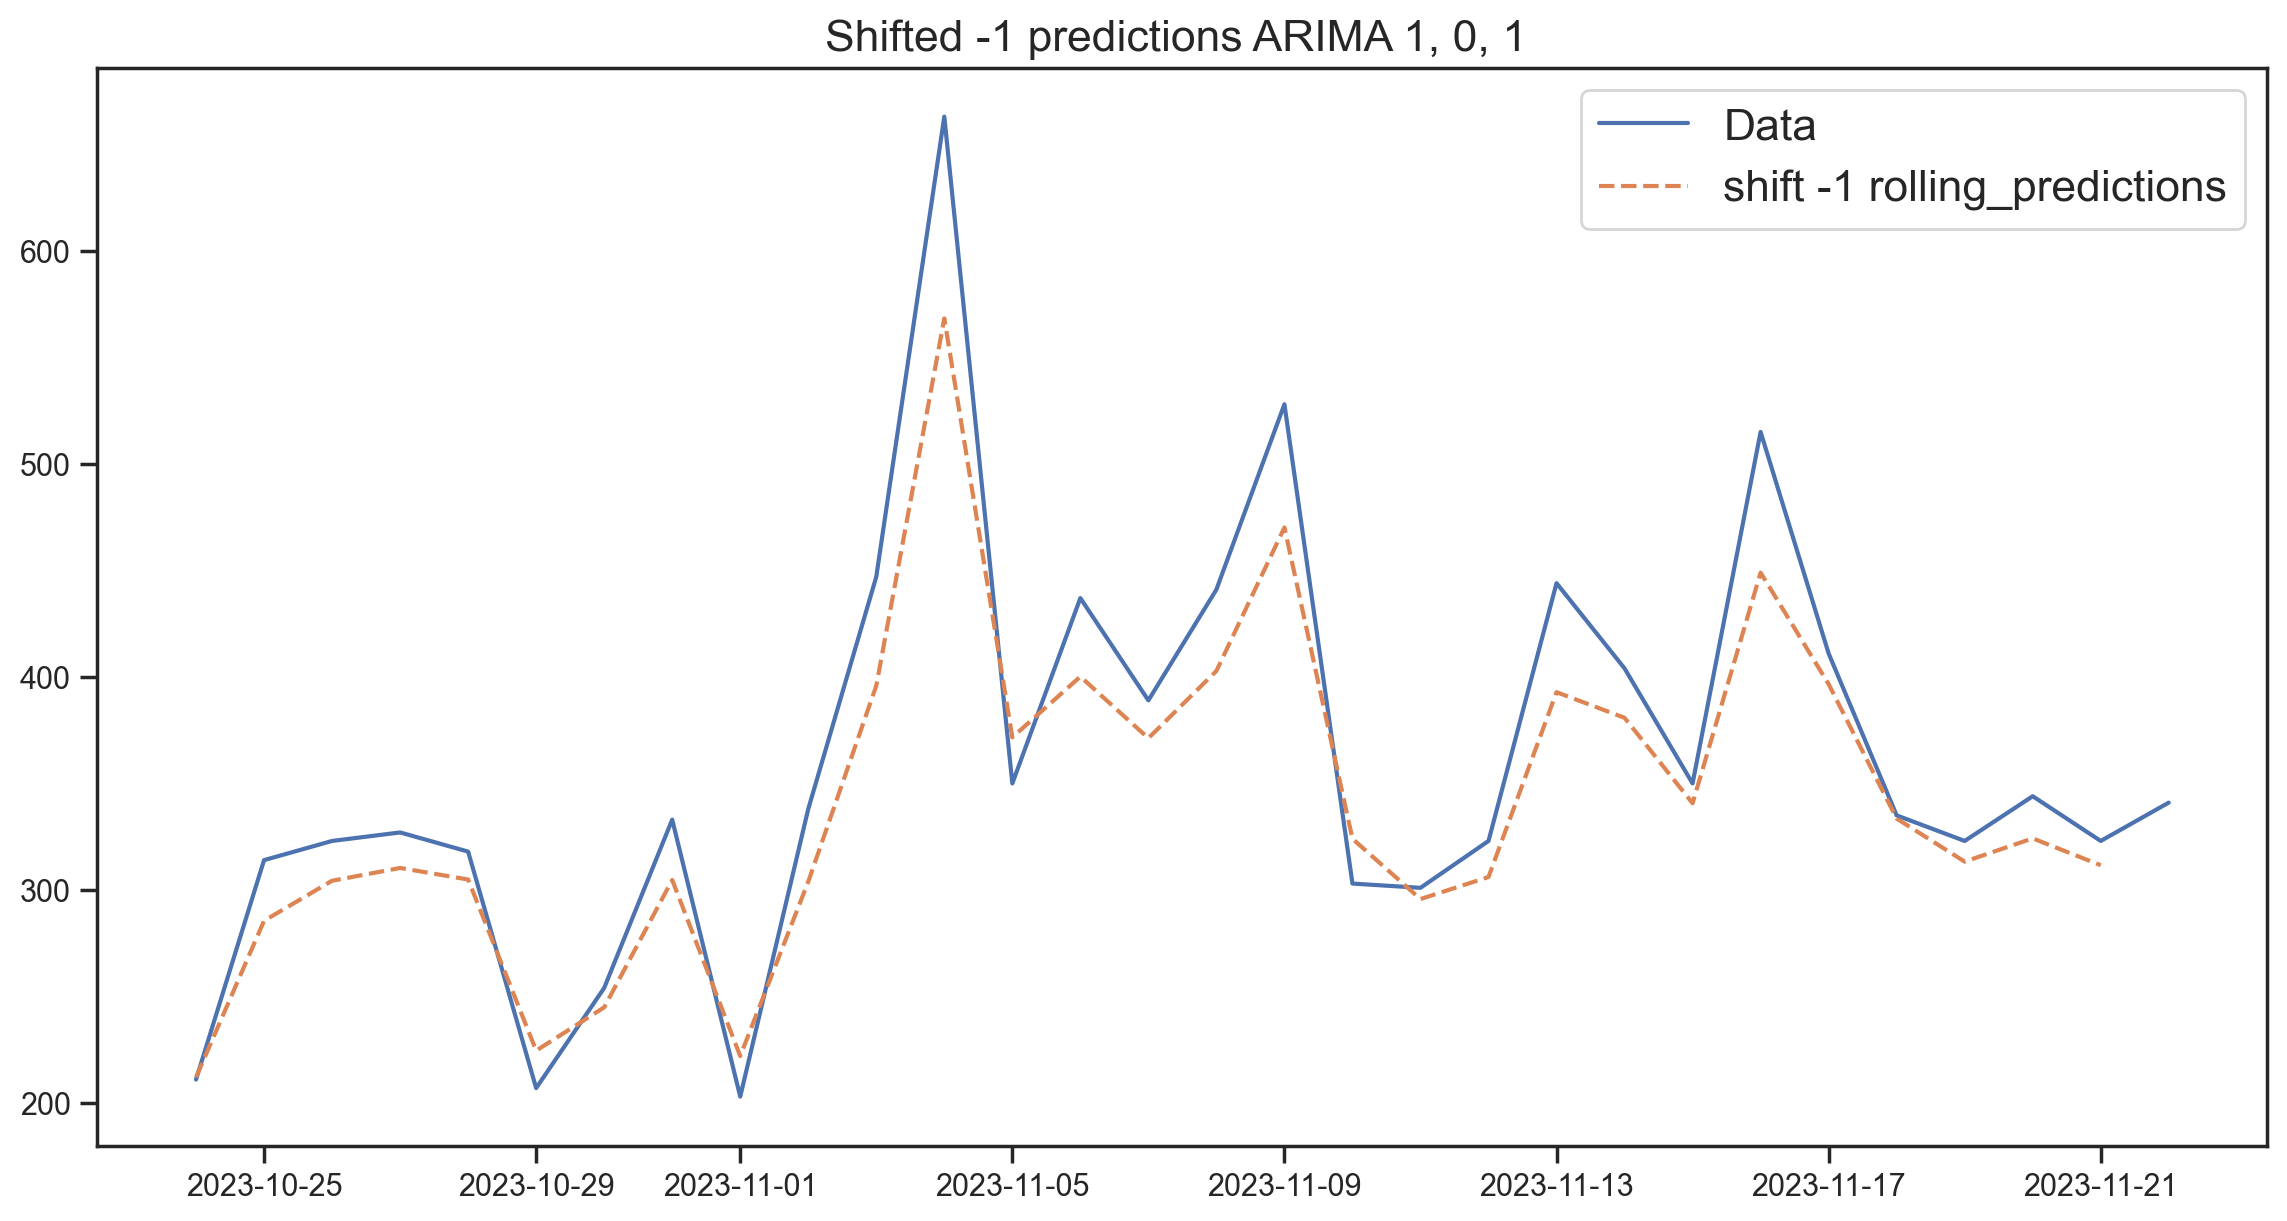

In [178]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions.shift(-1) , '--')
plt.legend(('Data', 'shift -1 rolling_predictions'), fontsize=16)
plt.title("Shifted -1 predictions ARIMA {}, {}, {} ".format(p,d,q), fontsize=16)

### 1.3.2 ARIMA 1, 0, 1 without rolling

In [46]:
train_end = datetime(2023, 11, 18) # 4 days
test_end = datetime(2023, 11, 22)

train_data = sector_51[:train_end]['AQI']
test_data = sector_51[train_end + timedelta(days=1):test_end]['AQI']

p, d, q = (1, 0, 1)
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()
print("Model summary ", model_fit.summary())

Model summary                                 SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                 1354
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7586.904
Date:                Fri, 24 Nov 2023   AIC                          15181.809
Time:                        22:10:08   BIC                          15202.652
Sample:                    03-05-2020   HQIC                         15189.614
                         - 11-18-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        221.1100     13.944     15.856      0.000     193.779     248.441
ar.L1          0.8856      0.012     71.010      0.000       0.861       0.910
ma.L1         -0.1880      0.025     

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [47]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
pred_start_date, pred_end_date

(Timestamp('2023-11-19 00:00:00'), Timestamp('2023-11-22 00:00:00'))

In [48]:
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'ARIMA 101')

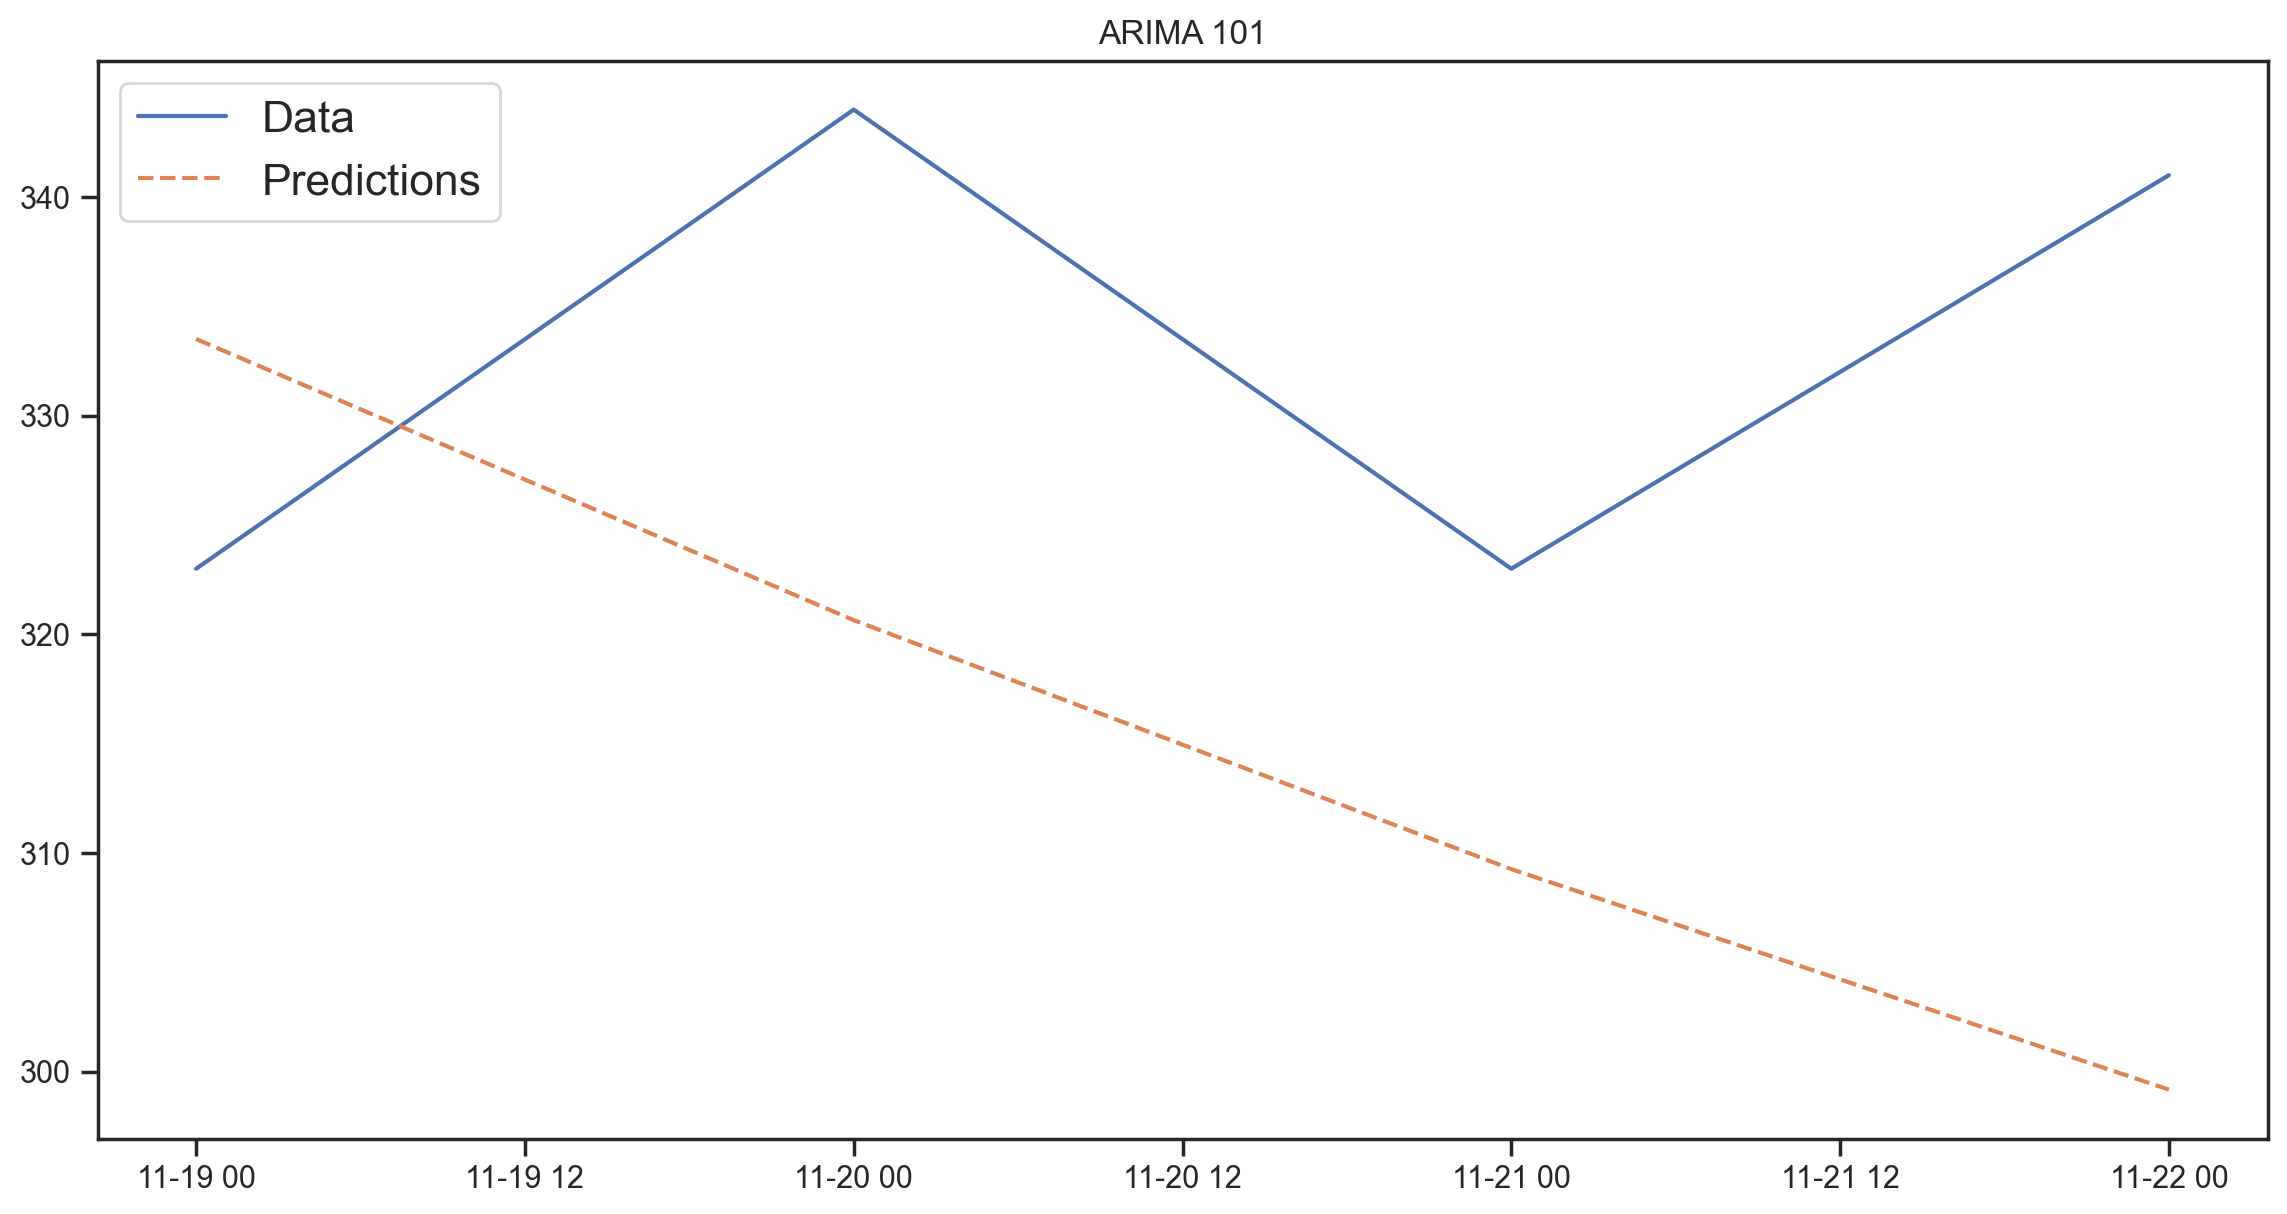

In [49]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(predictions, '--')
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title("ARIMA {}, {}, {}".format(p,d,q), fontsize=16)

### 1.3.2.2 ARIMA 1, 0, 4 without rolling

In [208]:
train_end = datetime(2023, 11, 16) # 7 days
test_end = datetime(2023, 11, 22)

train_data = sector_51[:train_end]['AQI']
test_data = sector_51[train_end + timedelta(days=1):test_end]['AQI']

p, d, q = (1, 0, 4)
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()
print("Model summary ", model_fit.summary())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Model summary                                 SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                 1352
Model:                 ARIMA(1, 0, 4)   Log Likelihood               -7542.021
Date:                Sat, 25 Nov 2023   AIC                          15098.041
Time:                        07:40:03   BIC                          15134.507
Sample:                    03-05-2020   HQIC                         15111.696
                         - 11-16-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        220.8951     27.798      7.946      0.000     166.412     275.378
ar.L1          0.9785      0.008    123.655      0.000       0.963       0.994
ma.L1         -0.2898      0.022    -

In [209]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
pred_start_date, pred_end_date

(Timestamp('2023-11-17 00:00:00'), Timestamp('2023-11-22 00:00:00'))

In [210]:
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'ARIMA 1, 0, 4')

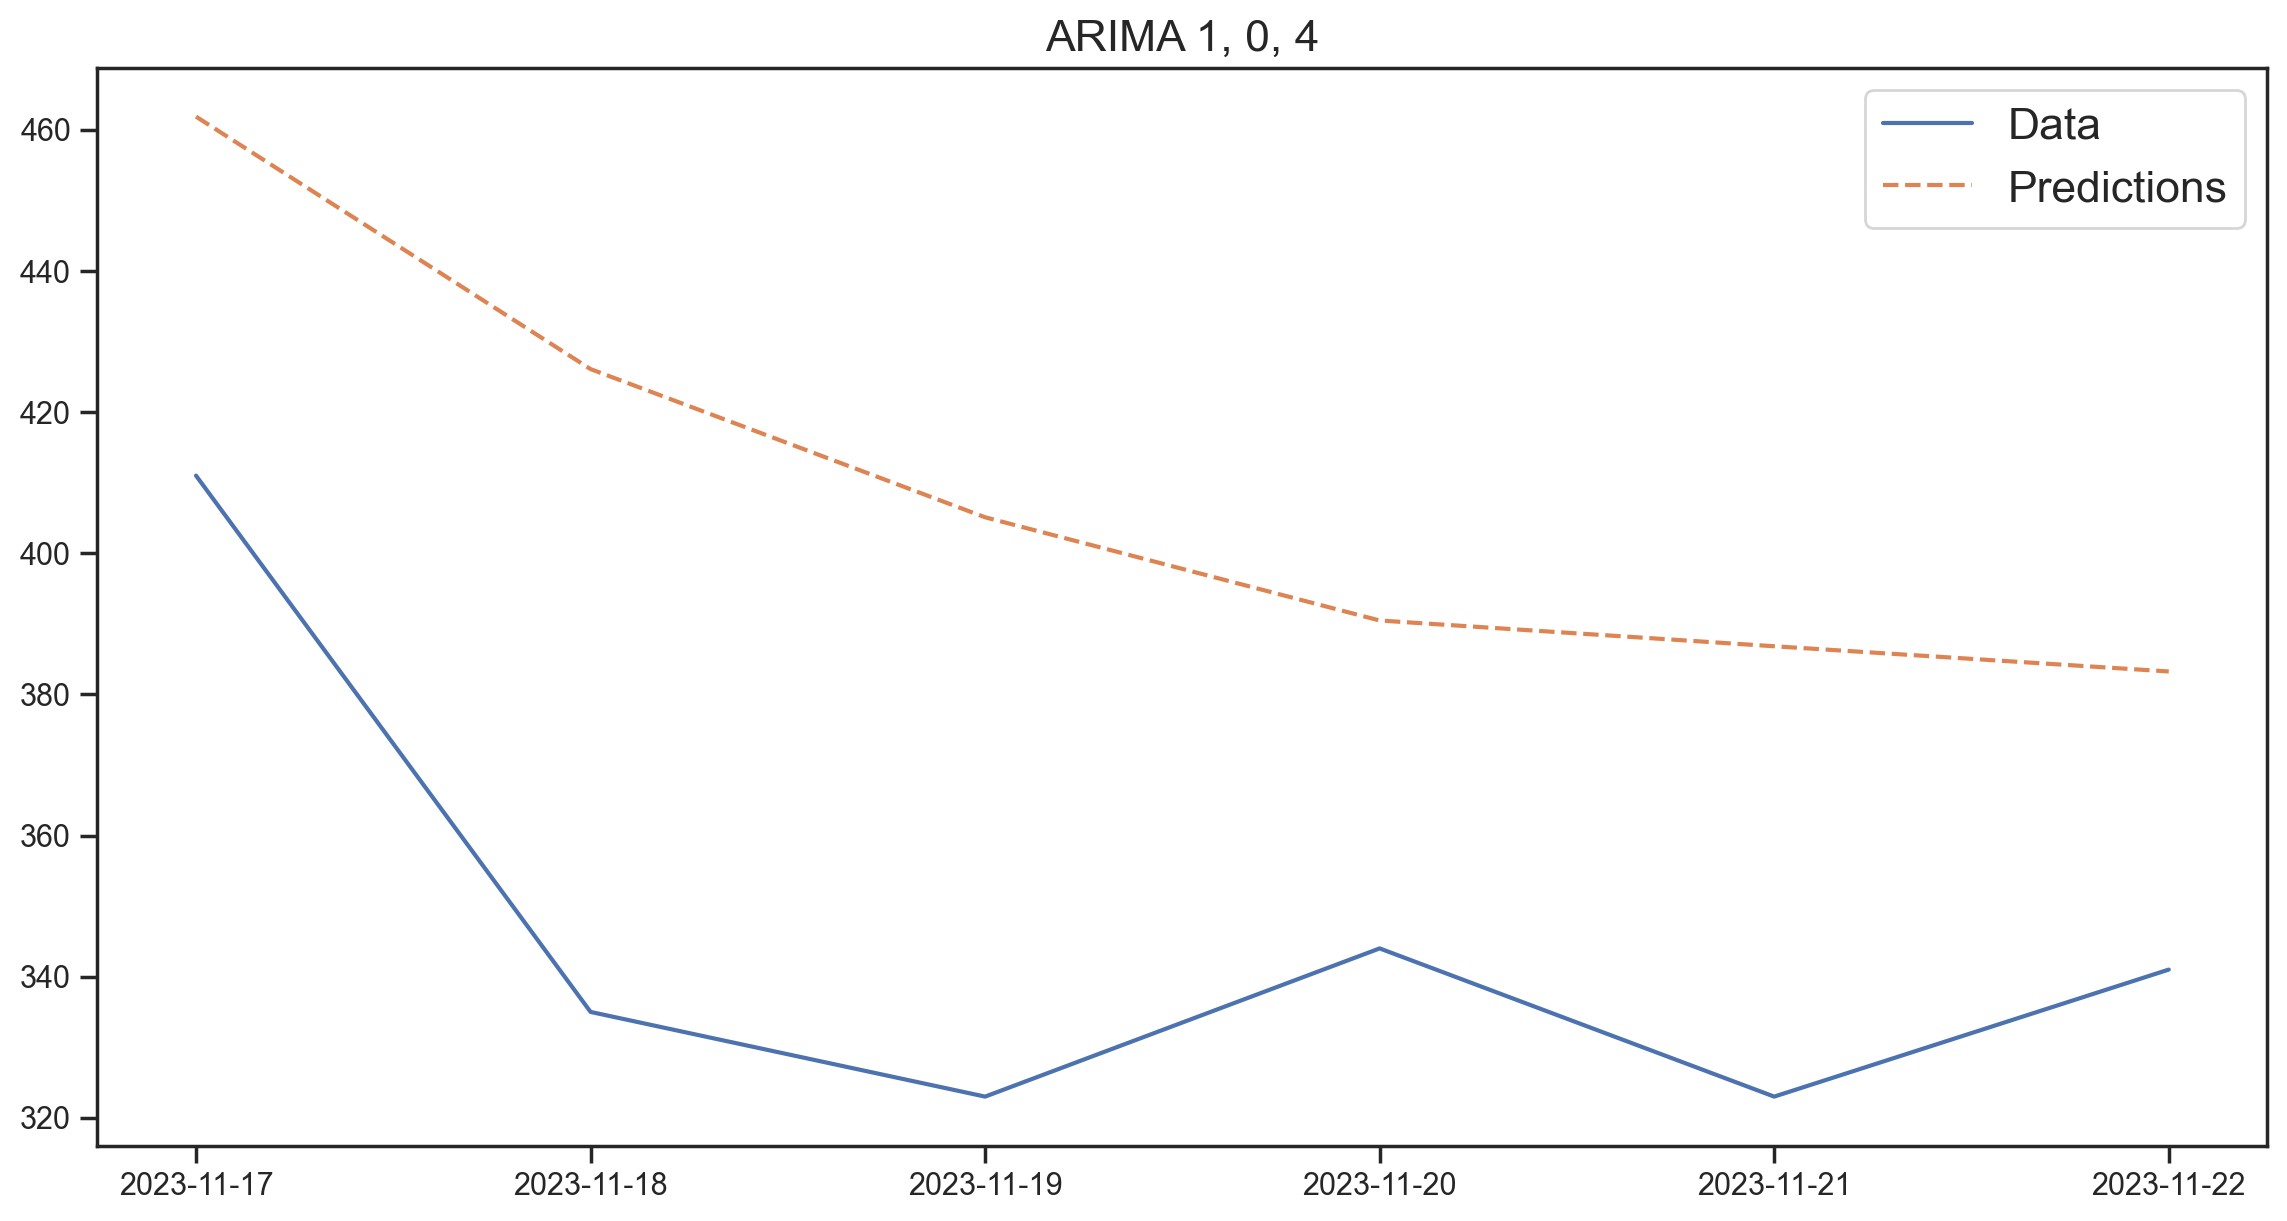

In [211]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(predictions, '--')
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title("ARIMA {}, {}, {}".format(p,d,q), fontsize=16)

### 1.3.3 ARIMA 1, 1, 1 rolling

In [116]:
train_end = datetime(2023, 10, 23)
test_end = datetime(2023, 11, 22)

train_data = sector_51[:train_end]['AQI']
test_data = sector_51[train_end + timedelta(days=1):test_end]['AQI']

my_order = (1, 1, 1)
p,d,q = my_order
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    print("train_end-timedelta(days=1)", train_end - timedelta(days=1))
    train_data = sector_51[:train_end - timedelta(days=1)]['AQI']
    model = ARIMA(train_data, order=my_order)
    model_fit = model.fit()
    pred = model_fit.forecast()
    print("pred", pred)
    rolling_predictions[train_end] = pred

train_end-timedelta(days=1) 2023-10-23 00:00:00
pred 2023-10-24    206.83037
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-24 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-10-25    219.720846
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-25 00:00:00
pred 2023-10-26    289.621571
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-26 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-10-27    298.043289
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-27 00:00:00
pred 2023-10-28    303.077813
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-28 00:00:00
pred 2023-10-29    299.074118
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-29 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-10-30    224.54614
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-30 00:00:00
pred 2023-10-31    255.231655
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-31 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-01    309.329028
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-01 00:00:00
pred 2023-11-02    222.349051
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-02 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-03    313.013864
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-03 00:00:00
pred 2023-11-04    390.089359
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-04 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-05    545.611472
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-05 00:00:00
pred 2023-11-06    339.774651
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-06 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-07    400.355146
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-07 00:00:00
pred 2023-11-08    371.003779
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-08 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-09    408.38602
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-09 00:00:00
pred 2023-11-10    471.32988
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-10 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-11    322.763173
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-11 00:00:00
pred 2023-11-12    319.418305
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-12 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-13    332.674046
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-13 00:00:00
pred 2023-11-14    414.246267
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-14 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-15    389.888169
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-15 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-16    354.475544
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-16 00:00:00
pred 2023-11-17    466.256145
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-17 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-18    400.356131
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-18 00:00:00
pred 2023-11-19    349.764874
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-19 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-20    340.154971
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-20 00:00:00
pred 2023-11-21    352.760085
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-21 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-22    337.660974
Freq: D, dtype: float64


<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'ARIMA 1, 1, 1')

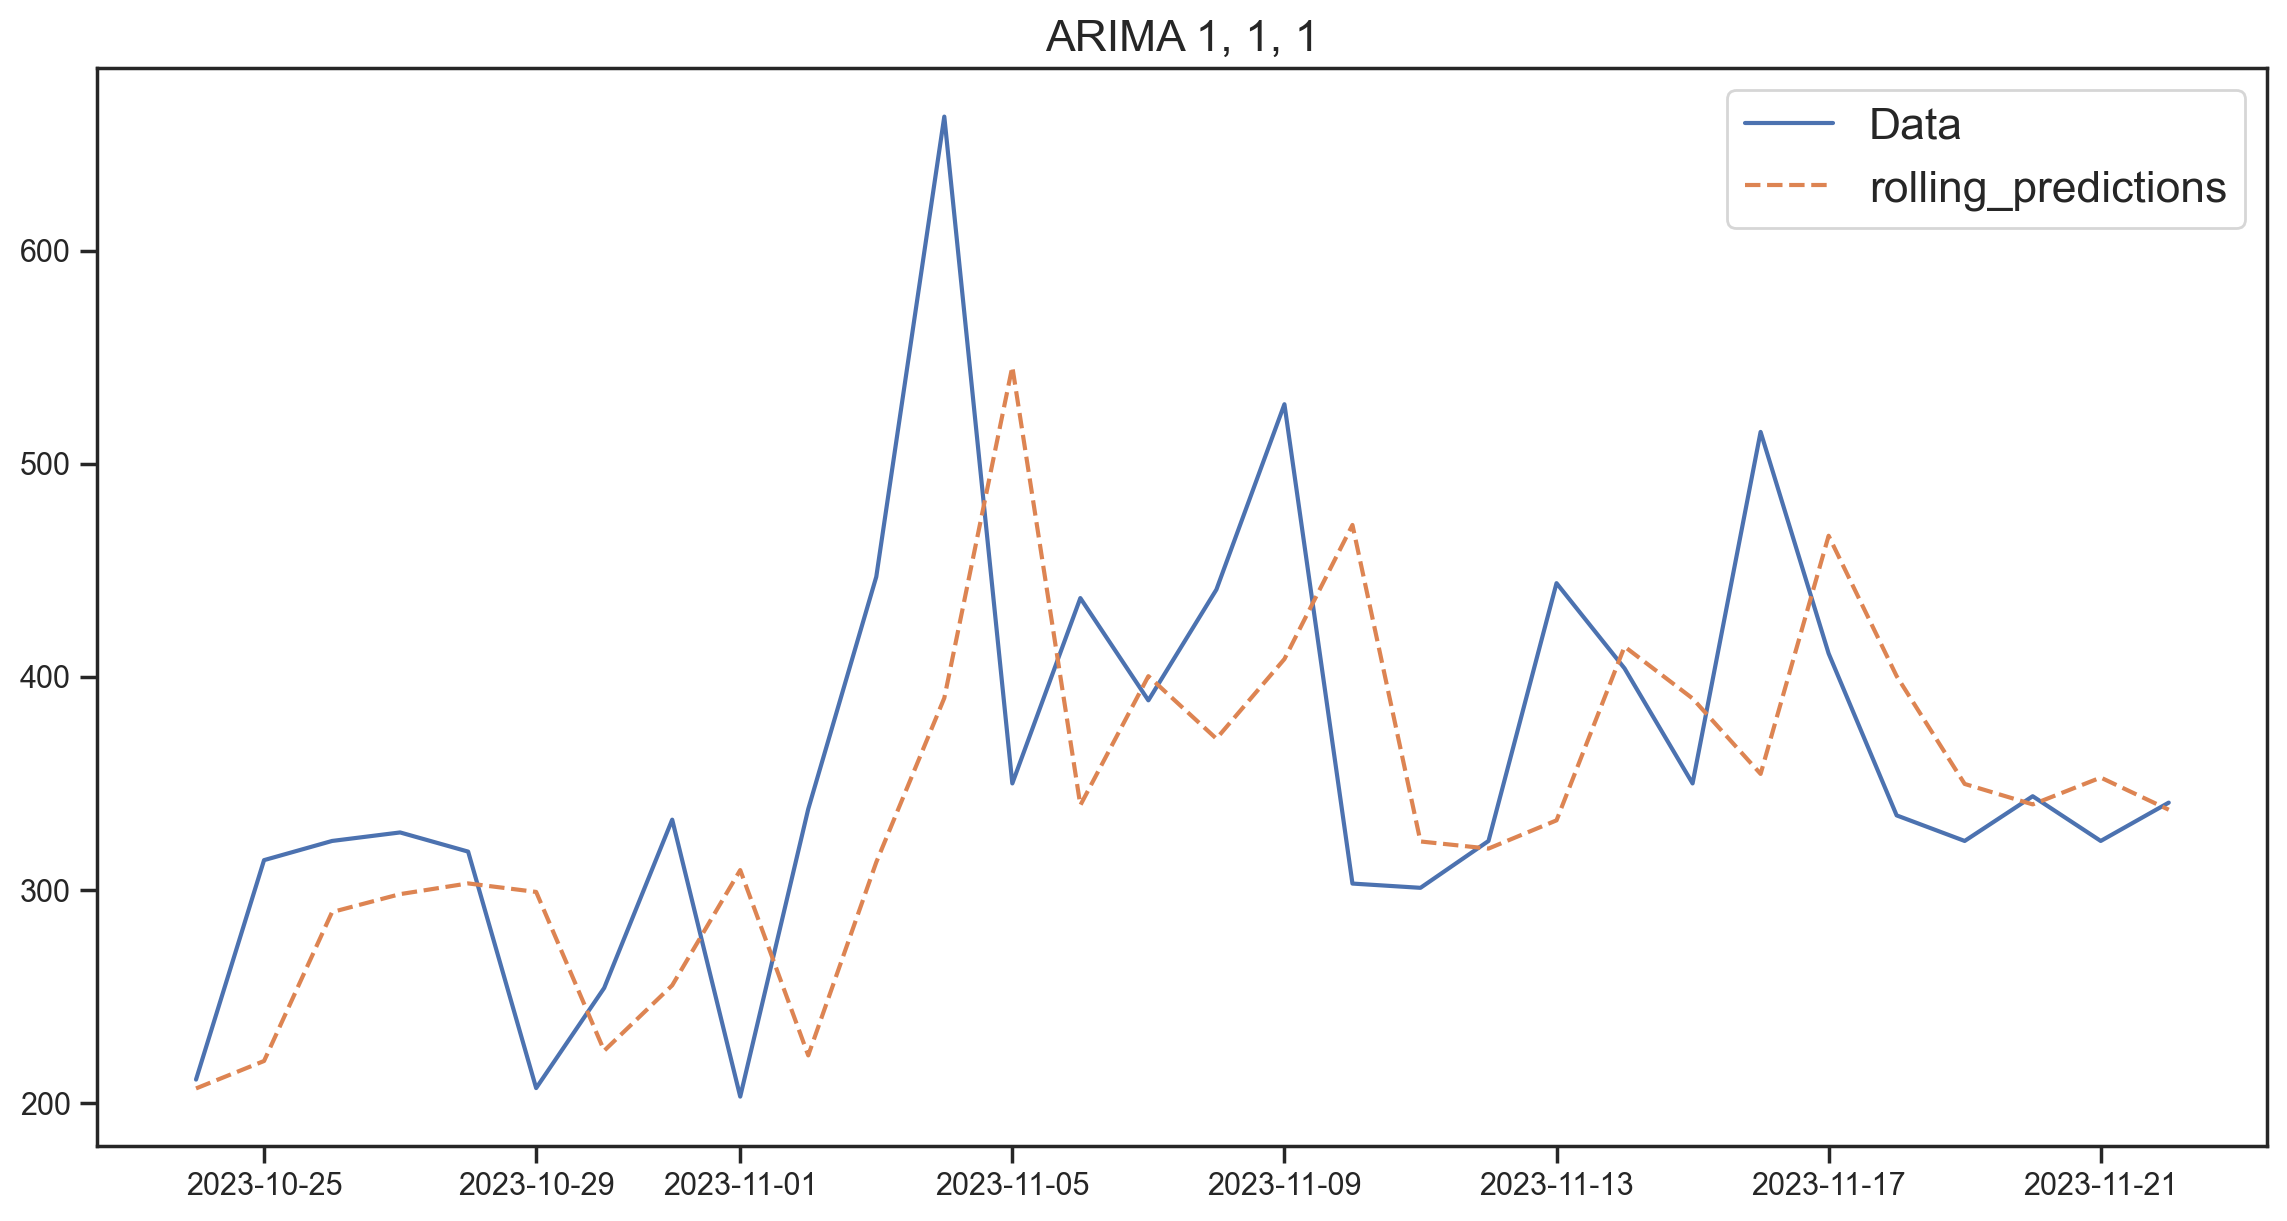

In [110]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions, '--')
plt.legend(('Data', 'rolling_predictions'), fontsize=16)
plt.title("ARIMA {}, {}, {}".format(p,d,q), fontsize=16)

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Shifted -1 predictions ARIMA 1, 1, 1 ')

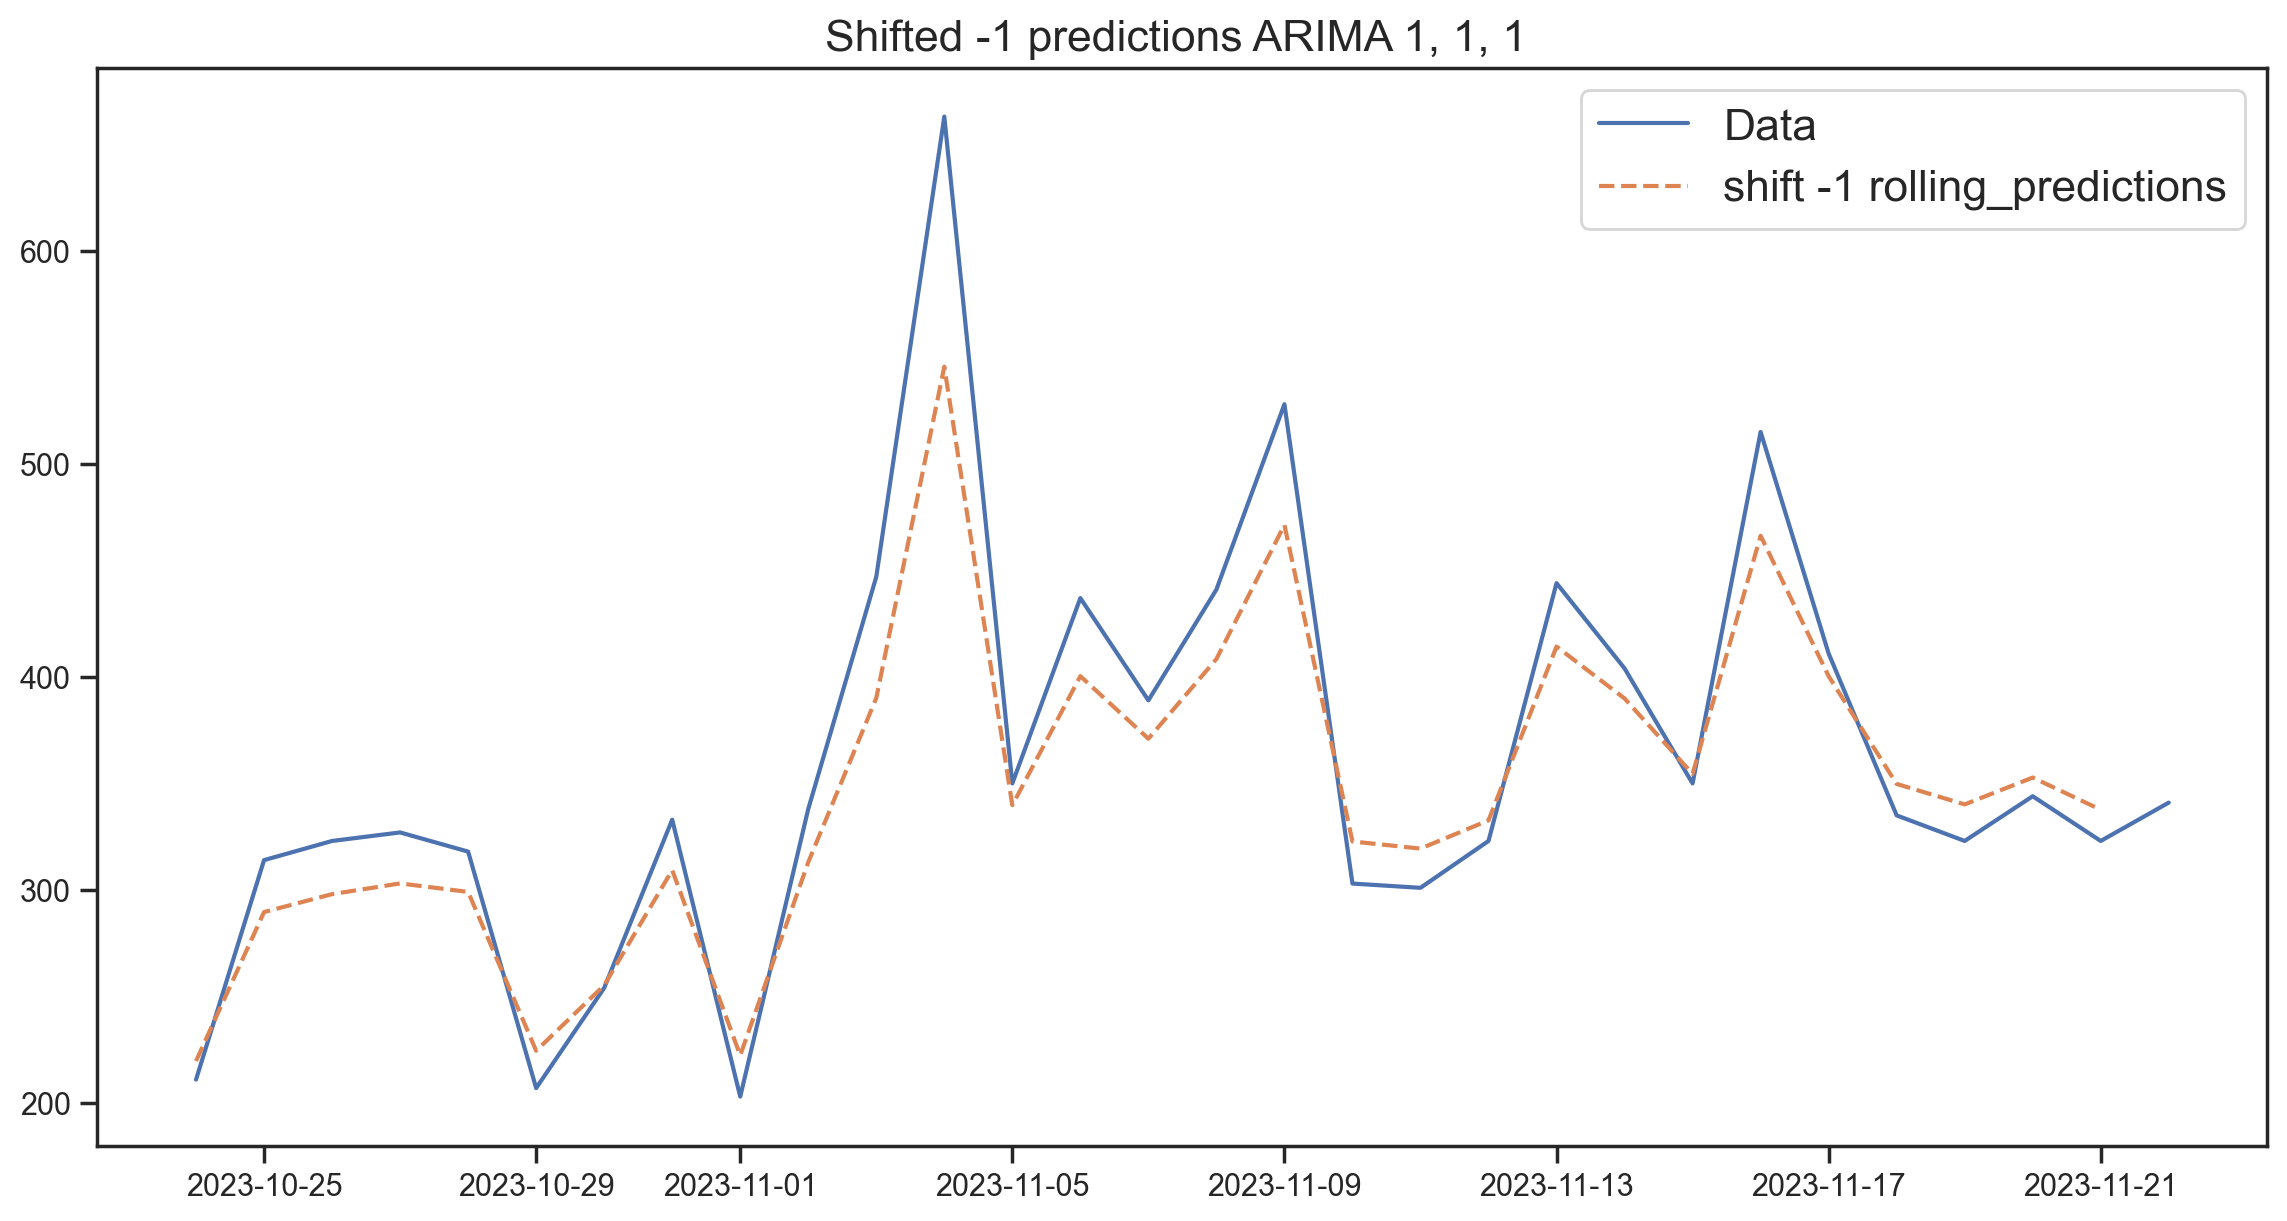

In [111]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions.shift(-1) , '--')
plt.legend(('Data', 'shift -1 rolling_predictions'), fontsize=16)
plt.title("Shifted -1 predictions ARIMA {}, {}, {} ".format(p,d,q), fontsize=16)

#### 1.3.3.2 Another way

In [86]:
sector_51['AQI']
sector_51['AQI'].diff(1)

From Date
2020-03-05     73.0
2020-03-06     55.0
2020-03-07     78.0
2020-03-08    120.0
2020-03-09    179.0
              ...  
2023-11-19    323.0
2023-11-20    344.0
2023-11-21    323.0
2023-11-22    341.0
2023-11-23    867.0
Name: AQI, Length: 1359, dtype: float64

From Date
2020-03-05      NaN
2020-03-06    -18.0
2020-03-07     23.0
2020-03-08     42.0
2020-03-09     59.0
              ...  
2023-11-19    -12.0
2023-11-20     21.0
2023-11-21    -21.0
2023-11-22     18.0
2023-11-23    526.0
Name: AQI, Length: 1359, dtype: float64

In [112]:
train_end = datetime(2023, 10, 23)
test_end = datetime(2023, 11, 22)

train_data = sector_51.diff(1).dropna()[:train_end]['AQI']
test_data = sector_51.diff(1).dropna()[train_end + timedelta(days=1):test_end]['AQI']

my_order = (2, 0, 1)
p,d,q = my_order
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    print("train_end-timedelta(days=1)", train_end - timedelta(days=1))
    train_data = sector_51.diff(1).dropna()[:train_end - timedelta(days=1)]['AQI']
    model = ARIMA(train_data, order=my_order)
    model_fit = model.fit()
    pred = model_fit.forecast()
    print("pred", pred)
    rolling_predictions[train_end] = pred

train_end-timedelta(days=1) 2023-10-23 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-10-24    12.787795
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-24 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-10-25    10.622005
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-25 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-10-26   -21.47275
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-26 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-10-27   -26.142735
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-27 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-10-28   -24.89364
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-28 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-10-29   -19.783528
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-29 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-10-30    15.10491
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-30 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-10-31    4.538017
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-31 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-01   -20.953357
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-01 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-02    16.081693
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-02 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-03   -20.150206
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-03 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-04   -55.381824
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-04 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-05   -115.3279
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-05 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-06   -22.521715
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-06 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-07   -32.776075
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-07 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-08   -17.967386
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-08 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-09   -29.706544
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-09 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-10   -53.809982
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-10 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-11    16.112131
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-11 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-12    22.813728
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-12 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-13    13.900105
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-13 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-14   -24.438229
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-14 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-15   -14.171605
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-15 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-16    5.213887
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-16 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-17   -43.131865
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-17 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-18   -12.807762
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-18 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-19    15.482955
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-19 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-20    20.28437
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-20 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-21    12.237323
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-21 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-22    16.587549
Freq: D, dtype: float64


<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Rolling ARIMA 2, 0, 1 for first difference')

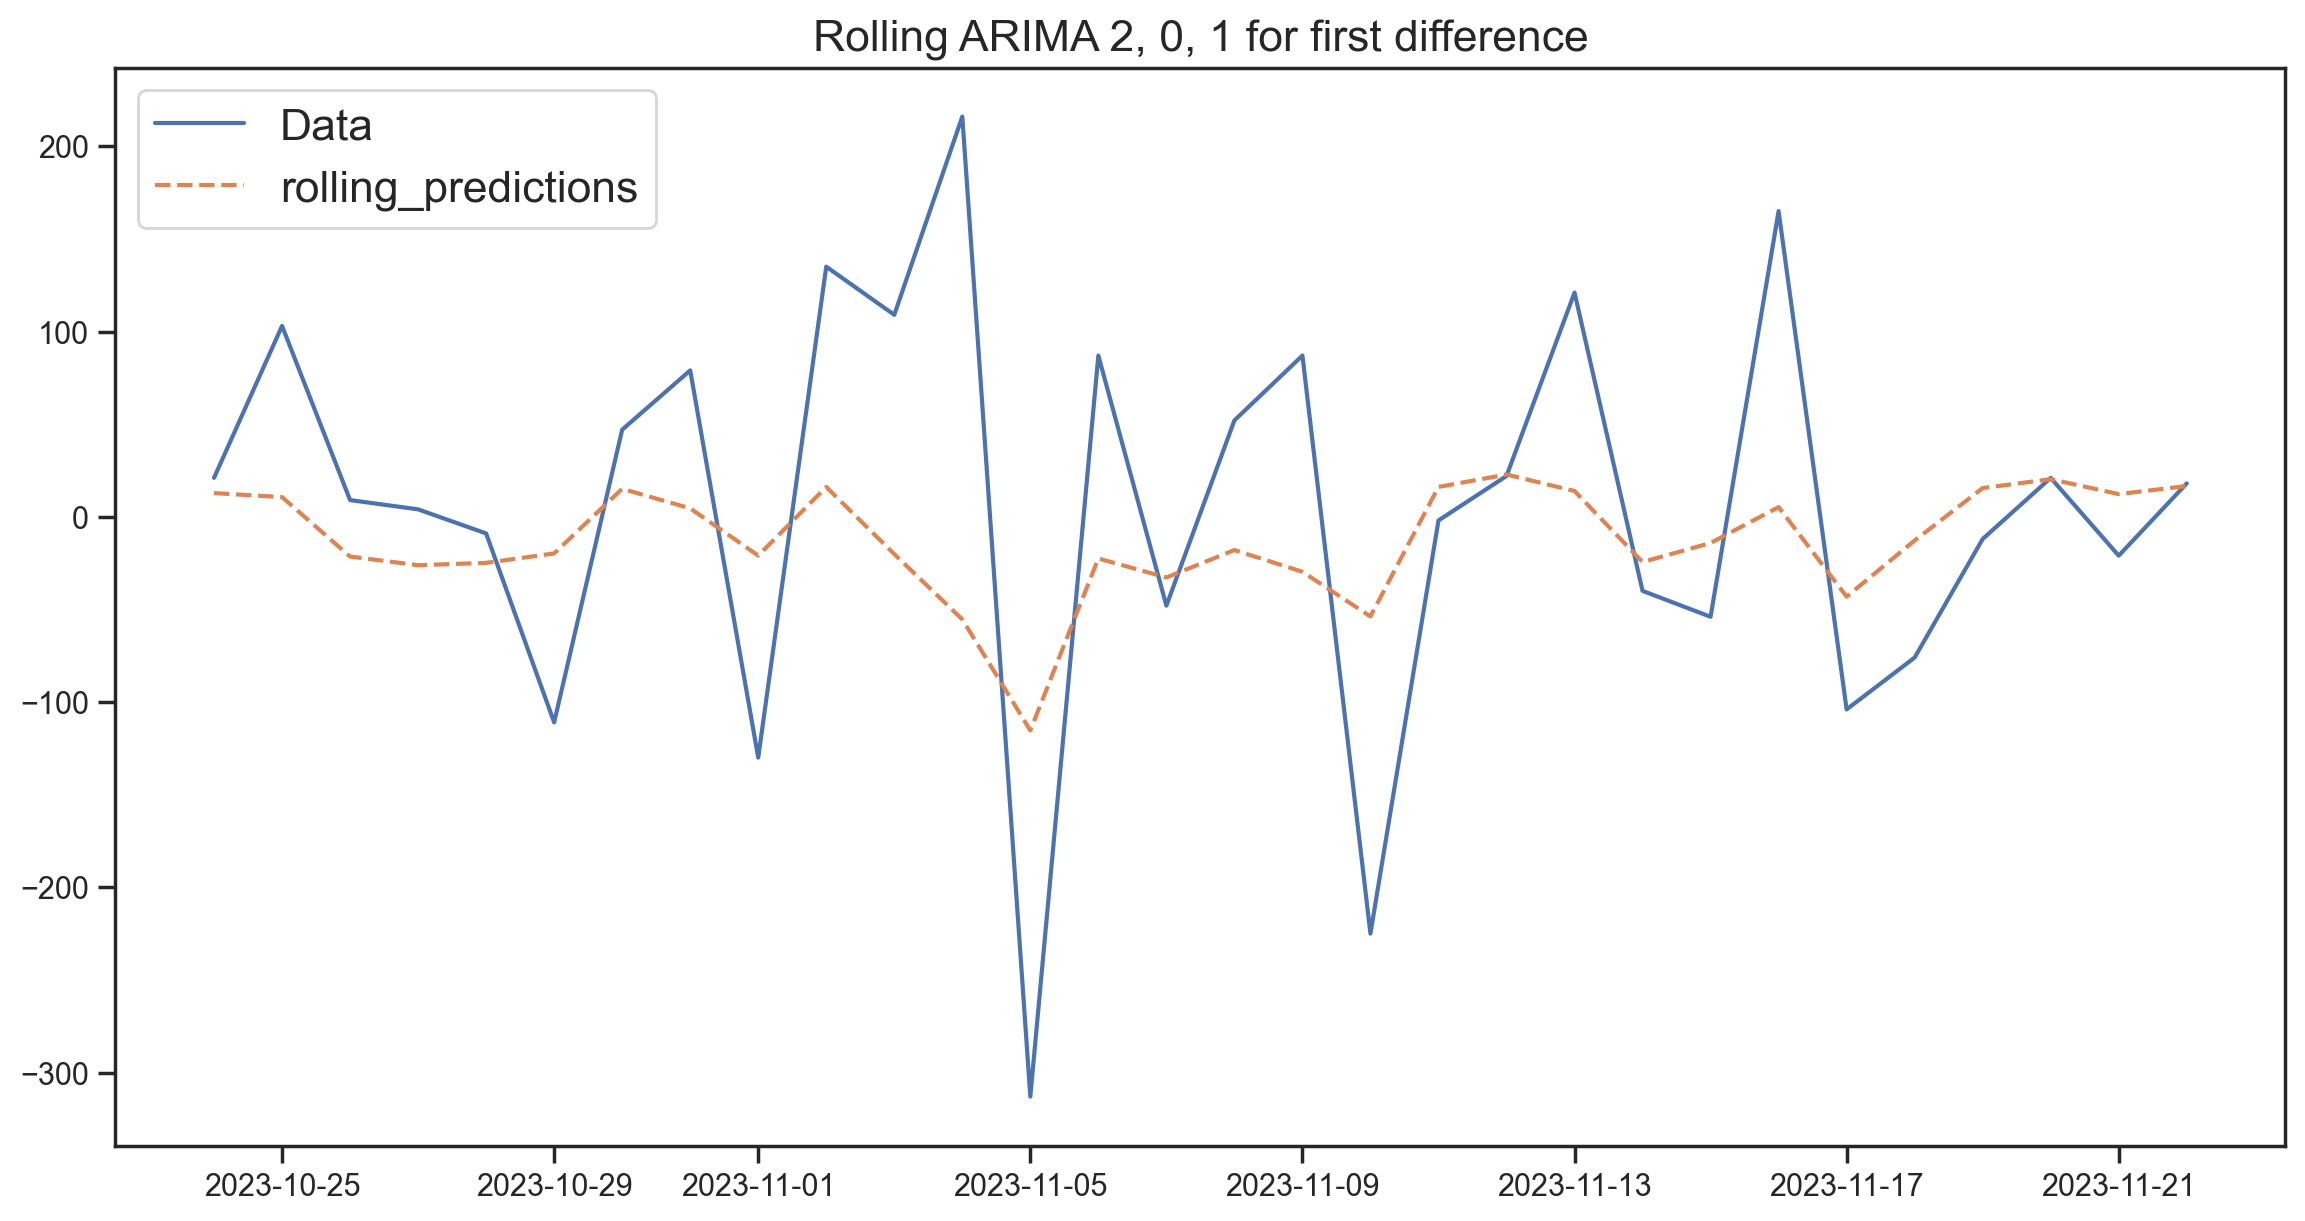

In [115]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions, '--')
plt.legend(('Data', 'rolling_predictions'), fontsize=16)
plt.title("Rolling ARIMA {}, {}, {} for first difference".format(p,d,q), fontsize=16)

In [103]:
print("ARIMA {}, {}, {}".format(p,d,q))

ARIMA 2, 0, 1


### 365 diff with rolling

In [192]:
train_end = datetime(2023, 10, 23)
test_end = datetime(2023, 11, 22)

train_data = sector_51.diff(365).dropna()[:train_end]['AQI']
test_data = sector_51.diff(365).dropna()[train_end + timedelta(days=1):test_end]['AQI']

my_order = (1, 0, 1)
p,d,q = my_order
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    print("train_end-timedelta(days=1)", train_end - timedelta(days=1))
    train_data = sector_51.diff(365).dropna()[:train_end - timedelta(days=1)]['AQI']
    model = ARIMA(train_data, order=my_order)
    model_fit = model.fit()
    pred = model_fit.forecast()
    print("pred", pred)
    rolling_predictions[train_end] = pred

train_end-timedelta(days=1) 2023-10-23 00:00:00
pred 2023-10-24   -92.750857
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-24 00:00:00
pred 2023-10-25   -83.320109
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-25 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-10-26   -21.267601
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-26 00:00:00
pred 2023-10-27   -13.718513
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-27 00:00:00
pred 2023-10-28   -23.367721
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-28 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-10-29   -33.97598
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-29 00:00:00
pred 2023-10-30   -188.838694
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-30 00:00:00
pred 2023-10-31   -96.509739
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-10-31 00:00:00
pred 2023-11-01   -100.88592
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-01 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-02   -113.593734
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-02 00:00:00
pred 2023-11-03   -13.5901
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-03 00:00:00
pred 2023-11-04   -73.043273
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-04 00:00:00
pred 2023-11-05    189.348334
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-05 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-06    18.18478
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-06 00:00:00
pred 2023-11-07    80.455077
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-07 00:00:00
pred 2023-11-08    45.021369
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-08 00:00:00
pred 2023-11-09    76.732852
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-09 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-10    170.795402
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-10 00:00:00
pred 2023-11-11   -2.706237
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-11 00:00:00
pred 2023-11-12   -121.471656
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-12 00:00:00
pred 2023-11-13    4.150934
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-13 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-14    55.862498
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-14 00:00:00
pred 2023-11-15    66.227343
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-15 00:00:00
pred 2023-11-16    23.754158
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-16 00:00:00
pred 2023-11-17    171.866953
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-17 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-18    78.664999
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-18 00:00:00
pred 2023-11-19   -5.04687
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-19 00:00:00
pred 2023-11-20    3.284031
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-20 00:00:00
pred 2023-11-21    31.91031
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-21 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-22    46.986413
Freq: D, dtype: float64


<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Rolling ARIMA 1, 0, 1 for first difference')

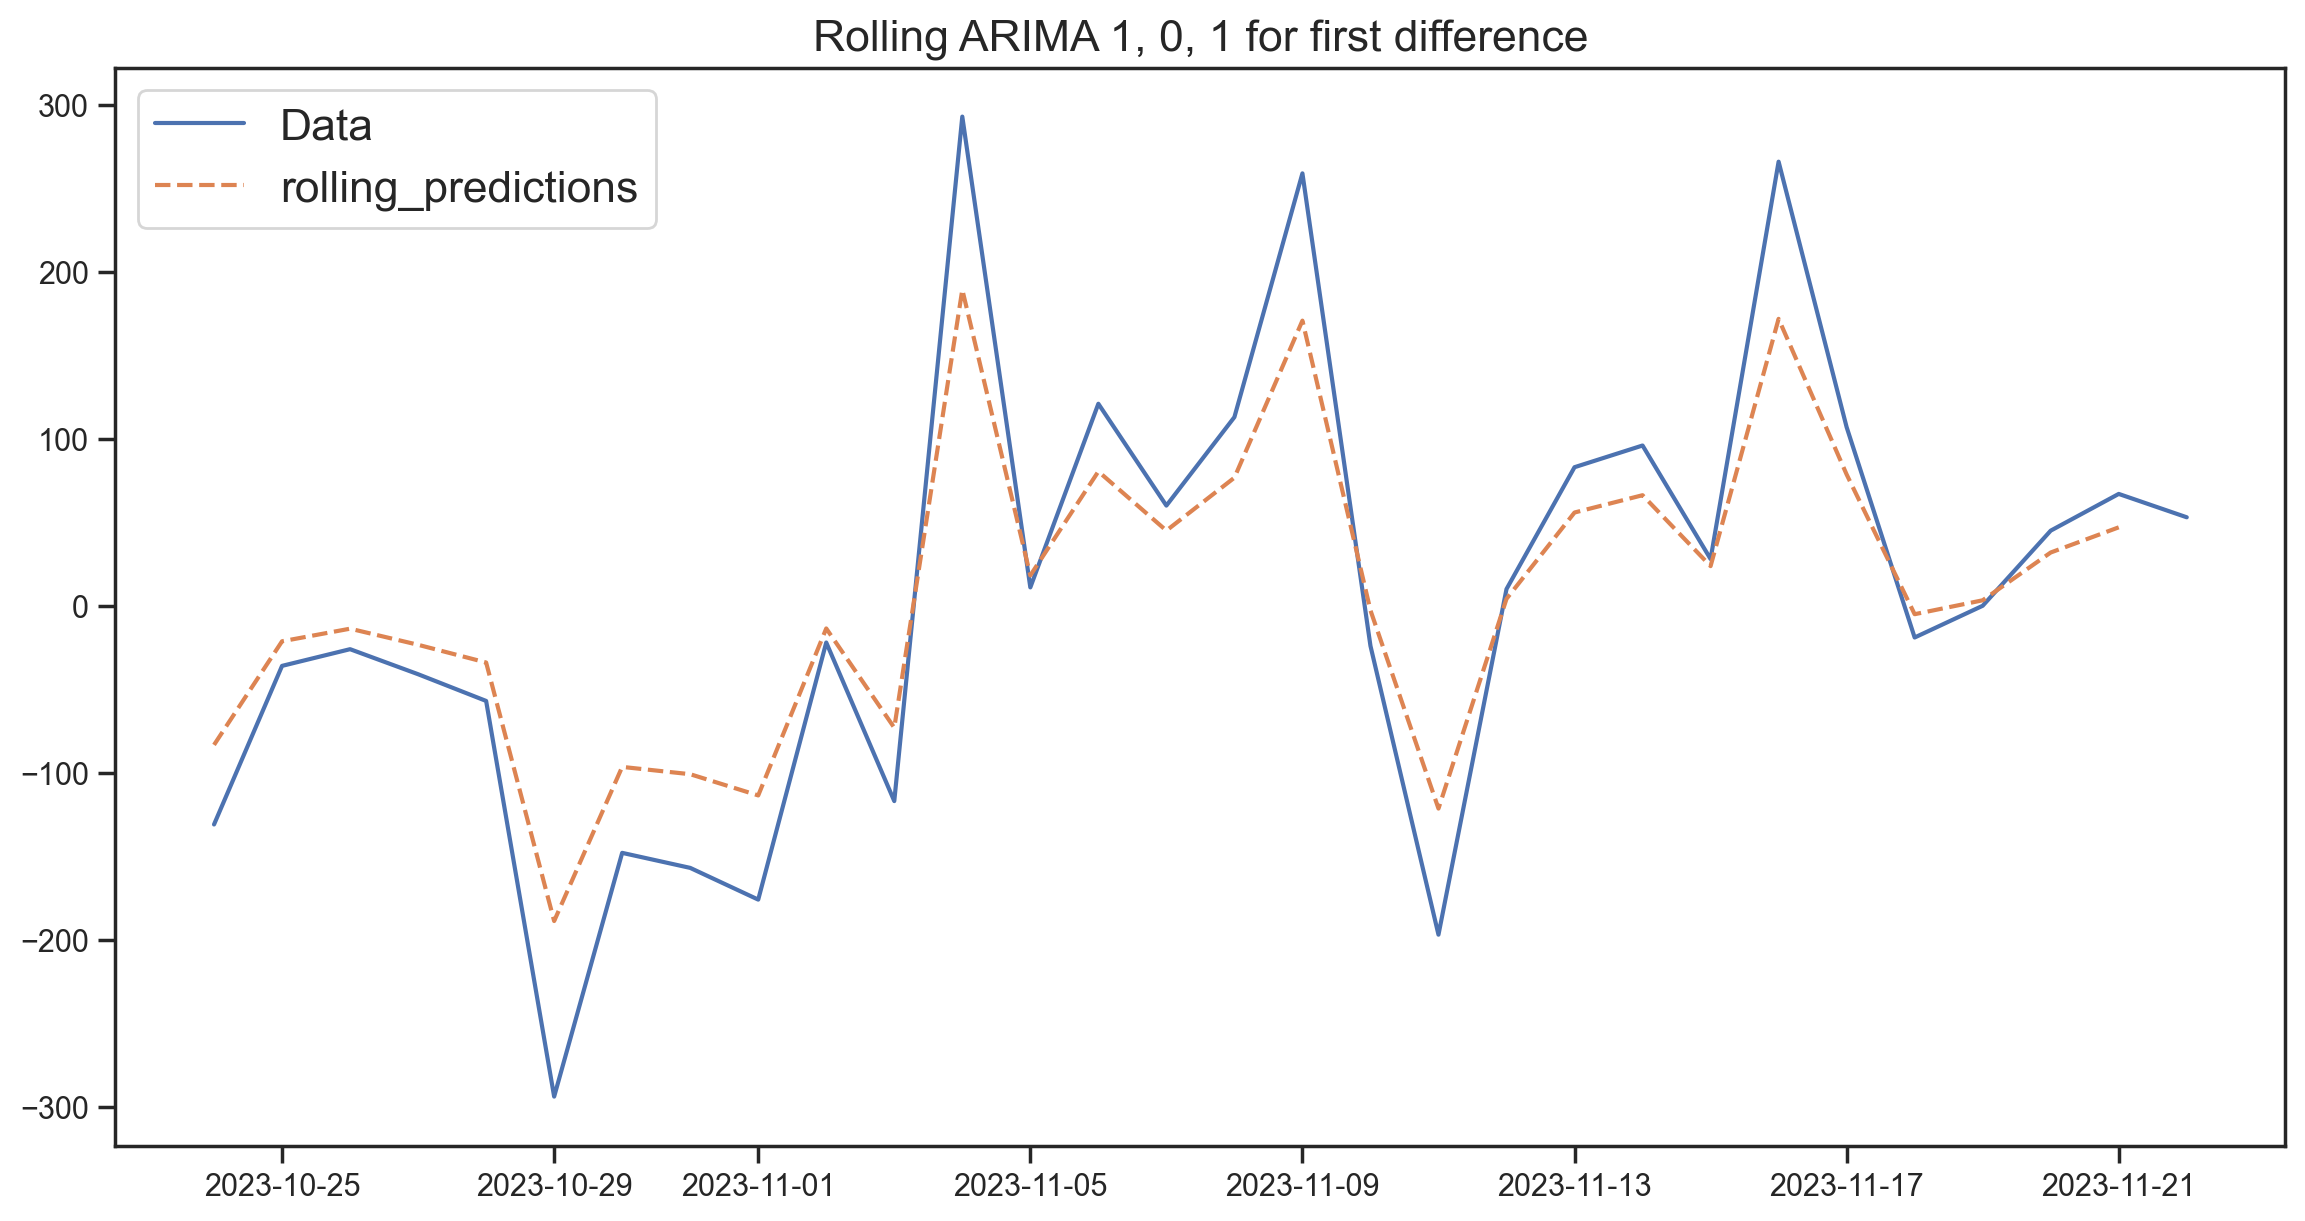

In [193]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions.shift(-1) , '--')
plt.legend(('Data', 'rolling_predictions'), fontsize=16)
plt.title("Rolling ARIMA {}, {}, {} for first difference".format(p,d,q), fontsize=16)

### 365 days diff without rolling

In [198]:
train_end = datetime(2023, 11, 18) # 4 days
test_end = datetime(2023, 11, 22)

train_data = sector_51.diff(365).dropna()[:train_end]['AQI']
test_data = sector_51.diff(365).dropna()[train_end + timedelta(days=1):test_end]['AQI']

p, d, q = (1, 0, 2)
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()
print("Model summary ", model_fit.summary())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Model summary                                 SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                  989
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -5831.311
Date:                Sat, 25 Nov 2023   AIC                          11672.623
Time:                        07:33:29   BIC                          11697.106
Sample:                    03-05-2021   HQIC                         11681.933
                         - 11-18-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7096     10.323      1.037      0.300      -9.523      30.942
ar.L1          0.8518      0.032     26.588      0.000       0.789       0.915
ma.L1         -0.2561      0.042     

In [199]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
pred_start_date, pred_end_date

(Timestamp('2023-11-19 00:00:00'), Timestamp('2023-11-22 00:00:00'))

In [200]:
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'ARIMA 102')

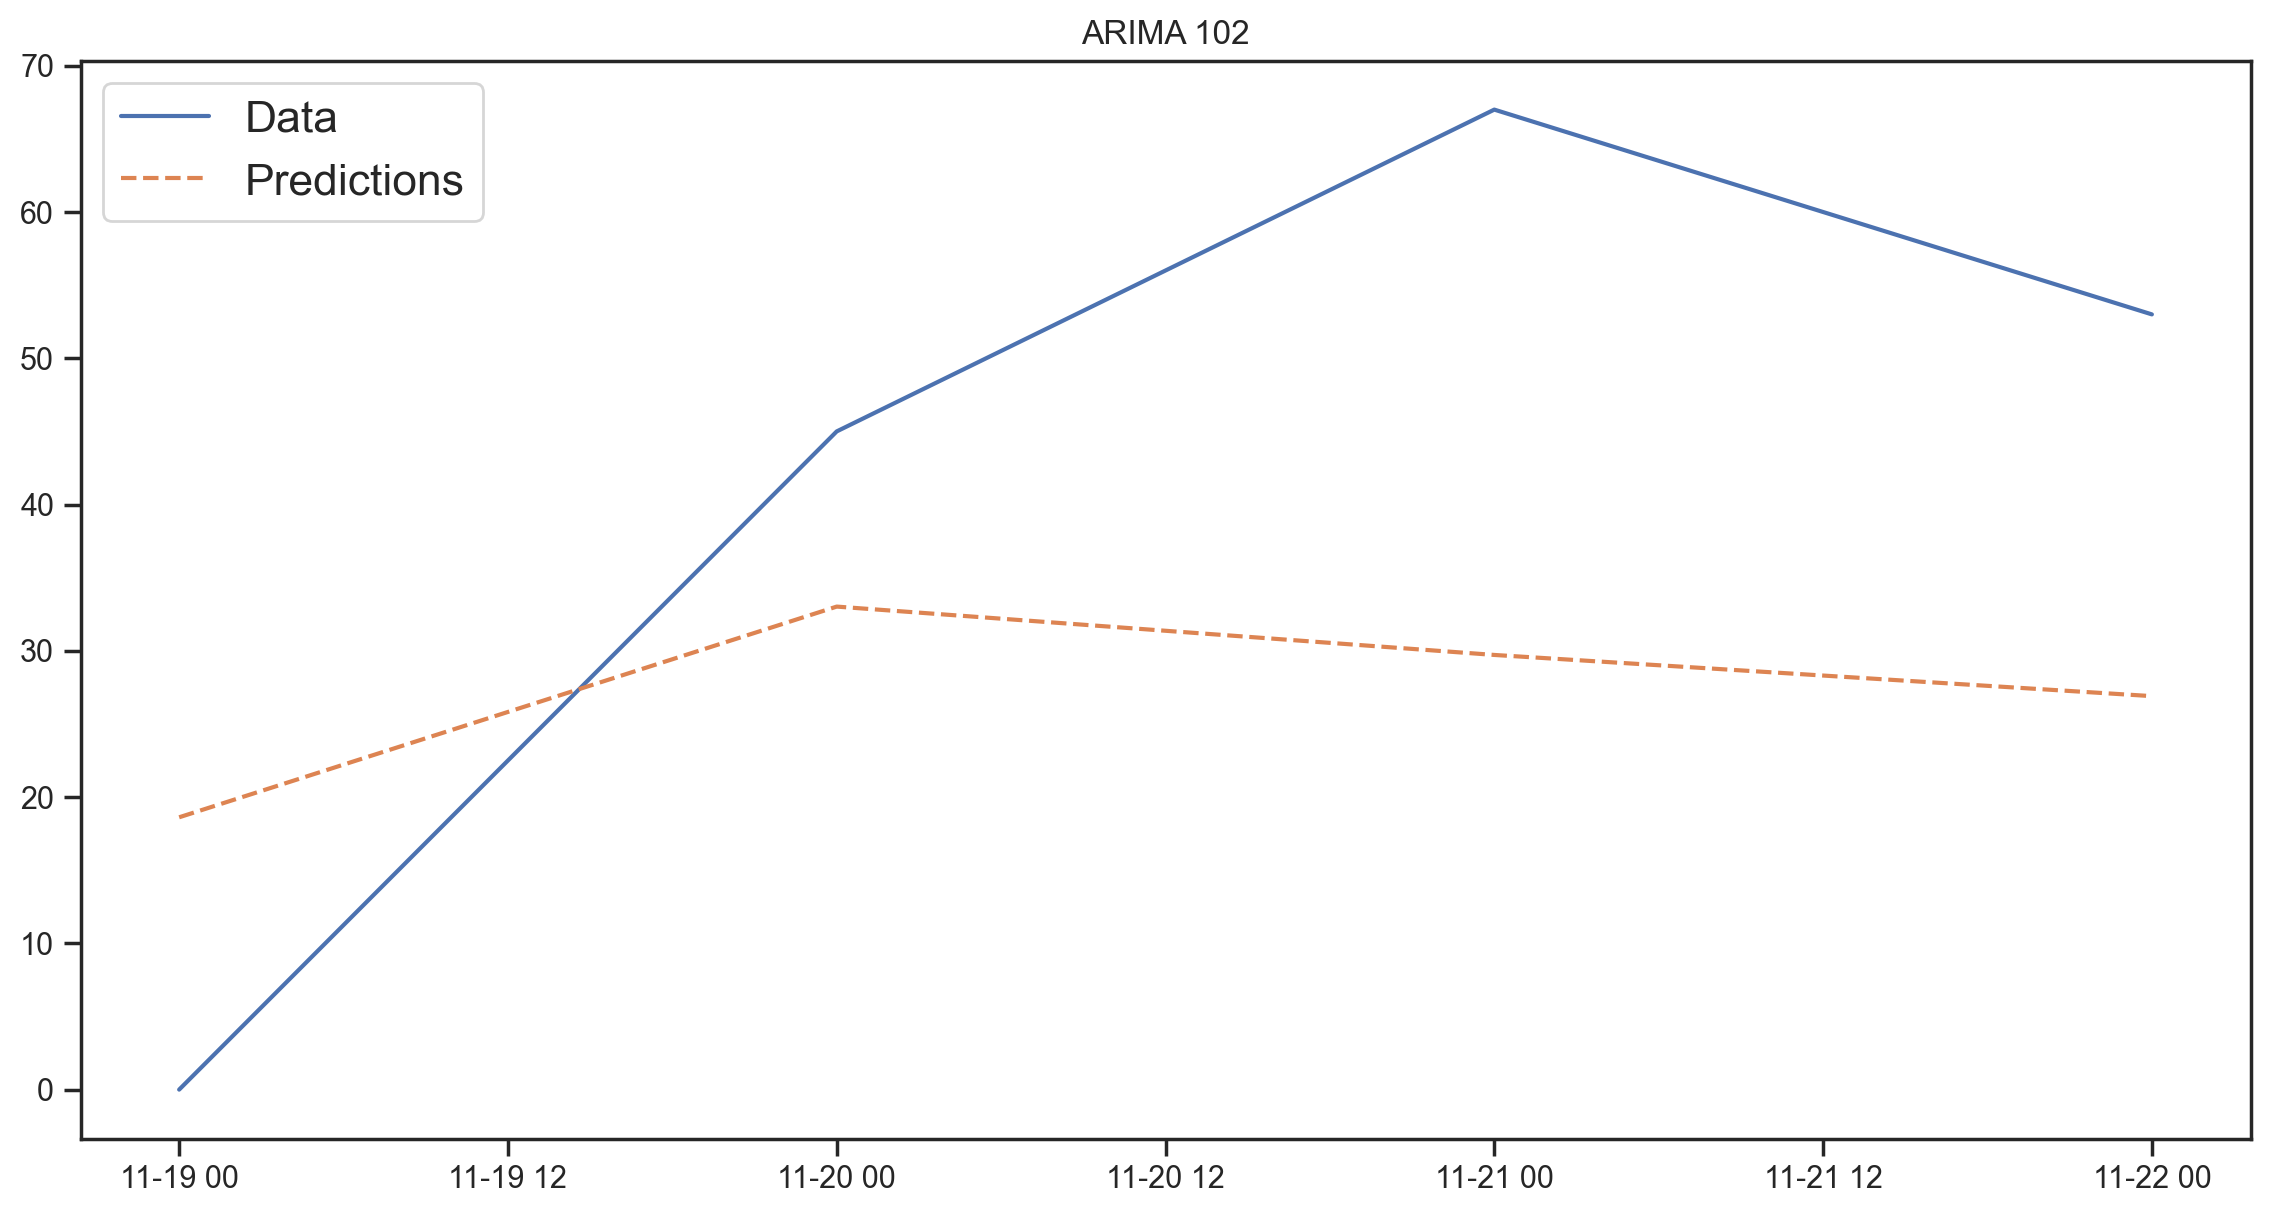

In [201]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(predictions, '--')
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title("ARIMA " + str(p) + str(d) + str(q))

### 1.3.4 ARIMA 1,1,1 without rolling

In [170]:
train_end = datetime(2023, 11, 18) # 4 days
test_end = datetime(2023, 11, 22)

train_data = sector_51[:train_end]['AQI']
test_data = sector_51[train_end + timedelta(days=1):test_end]['AQI']

p, d, q = (1, 1, 1)
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()
print("Model summary ", model_fit.summary())

Model summary                                 SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                 1354
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7552.598
Date:                Fri, 24 Nov 2023   AIC                          15111.197
Time:                        22:51:03   BIC                          15126.827
Sample:                    03-05-2020   HQIC                         15117.049
                         - 11-18-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5818      0.026     22.045      0.000       0.530       0.634
ma.L1         -0.9045      0.013    -67.362      0.000      -0.931      -0.878
sigma2      4129.2319    109.897     

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [171]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
pred_start_date, pred_end_date

(Timestamp('2023-11-19 00:00:00'), Timestamp('2023-11-22 00:00:00'))

In [172]:
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date, typ='levels')
residuals = test_data - predictions

<Figure size 1400x400 with 0 Axes>

Text(0.5, 1.0, 'Residuals from ARIMA 1, 1, 1 ')

Text(0, 0.5, 'Error')

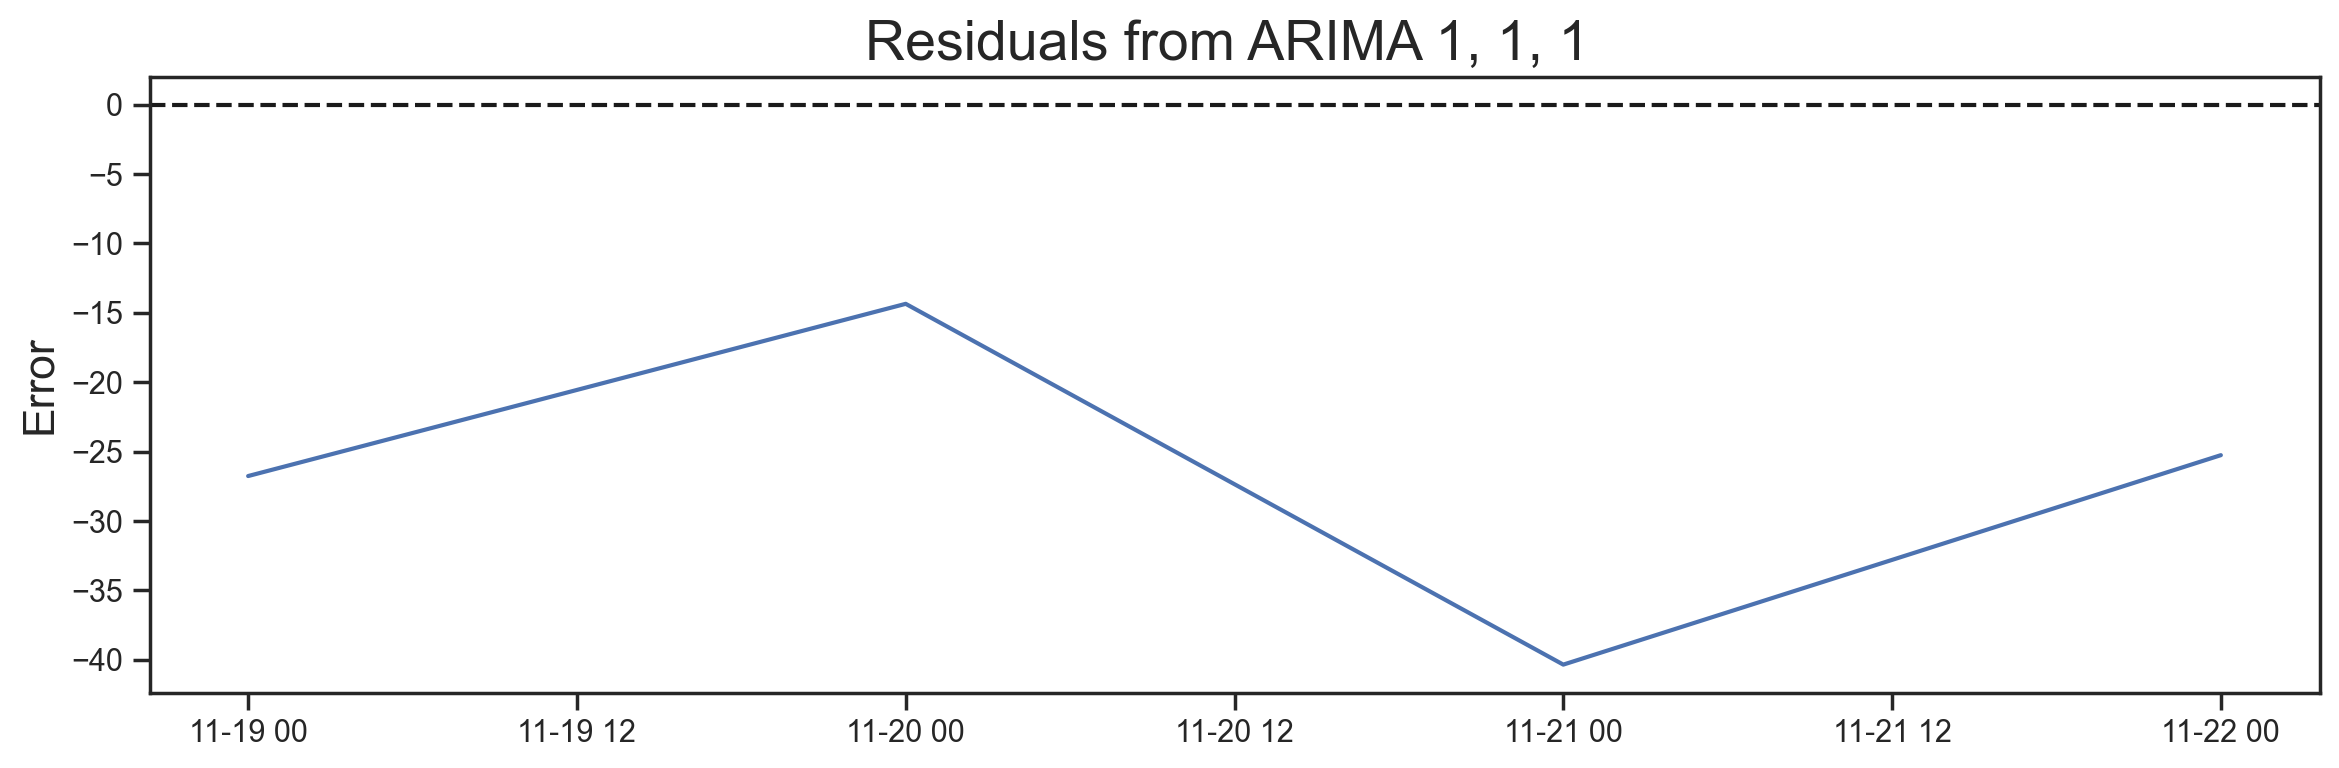

In [173]:
plt.figure(figsize=(14,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from ARIMA {}, {}, {} '.format(p,d,q), fontsize=20)
plt.ylabel('Error', fontsize=16)

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'ARIMA 1, 1, 1')

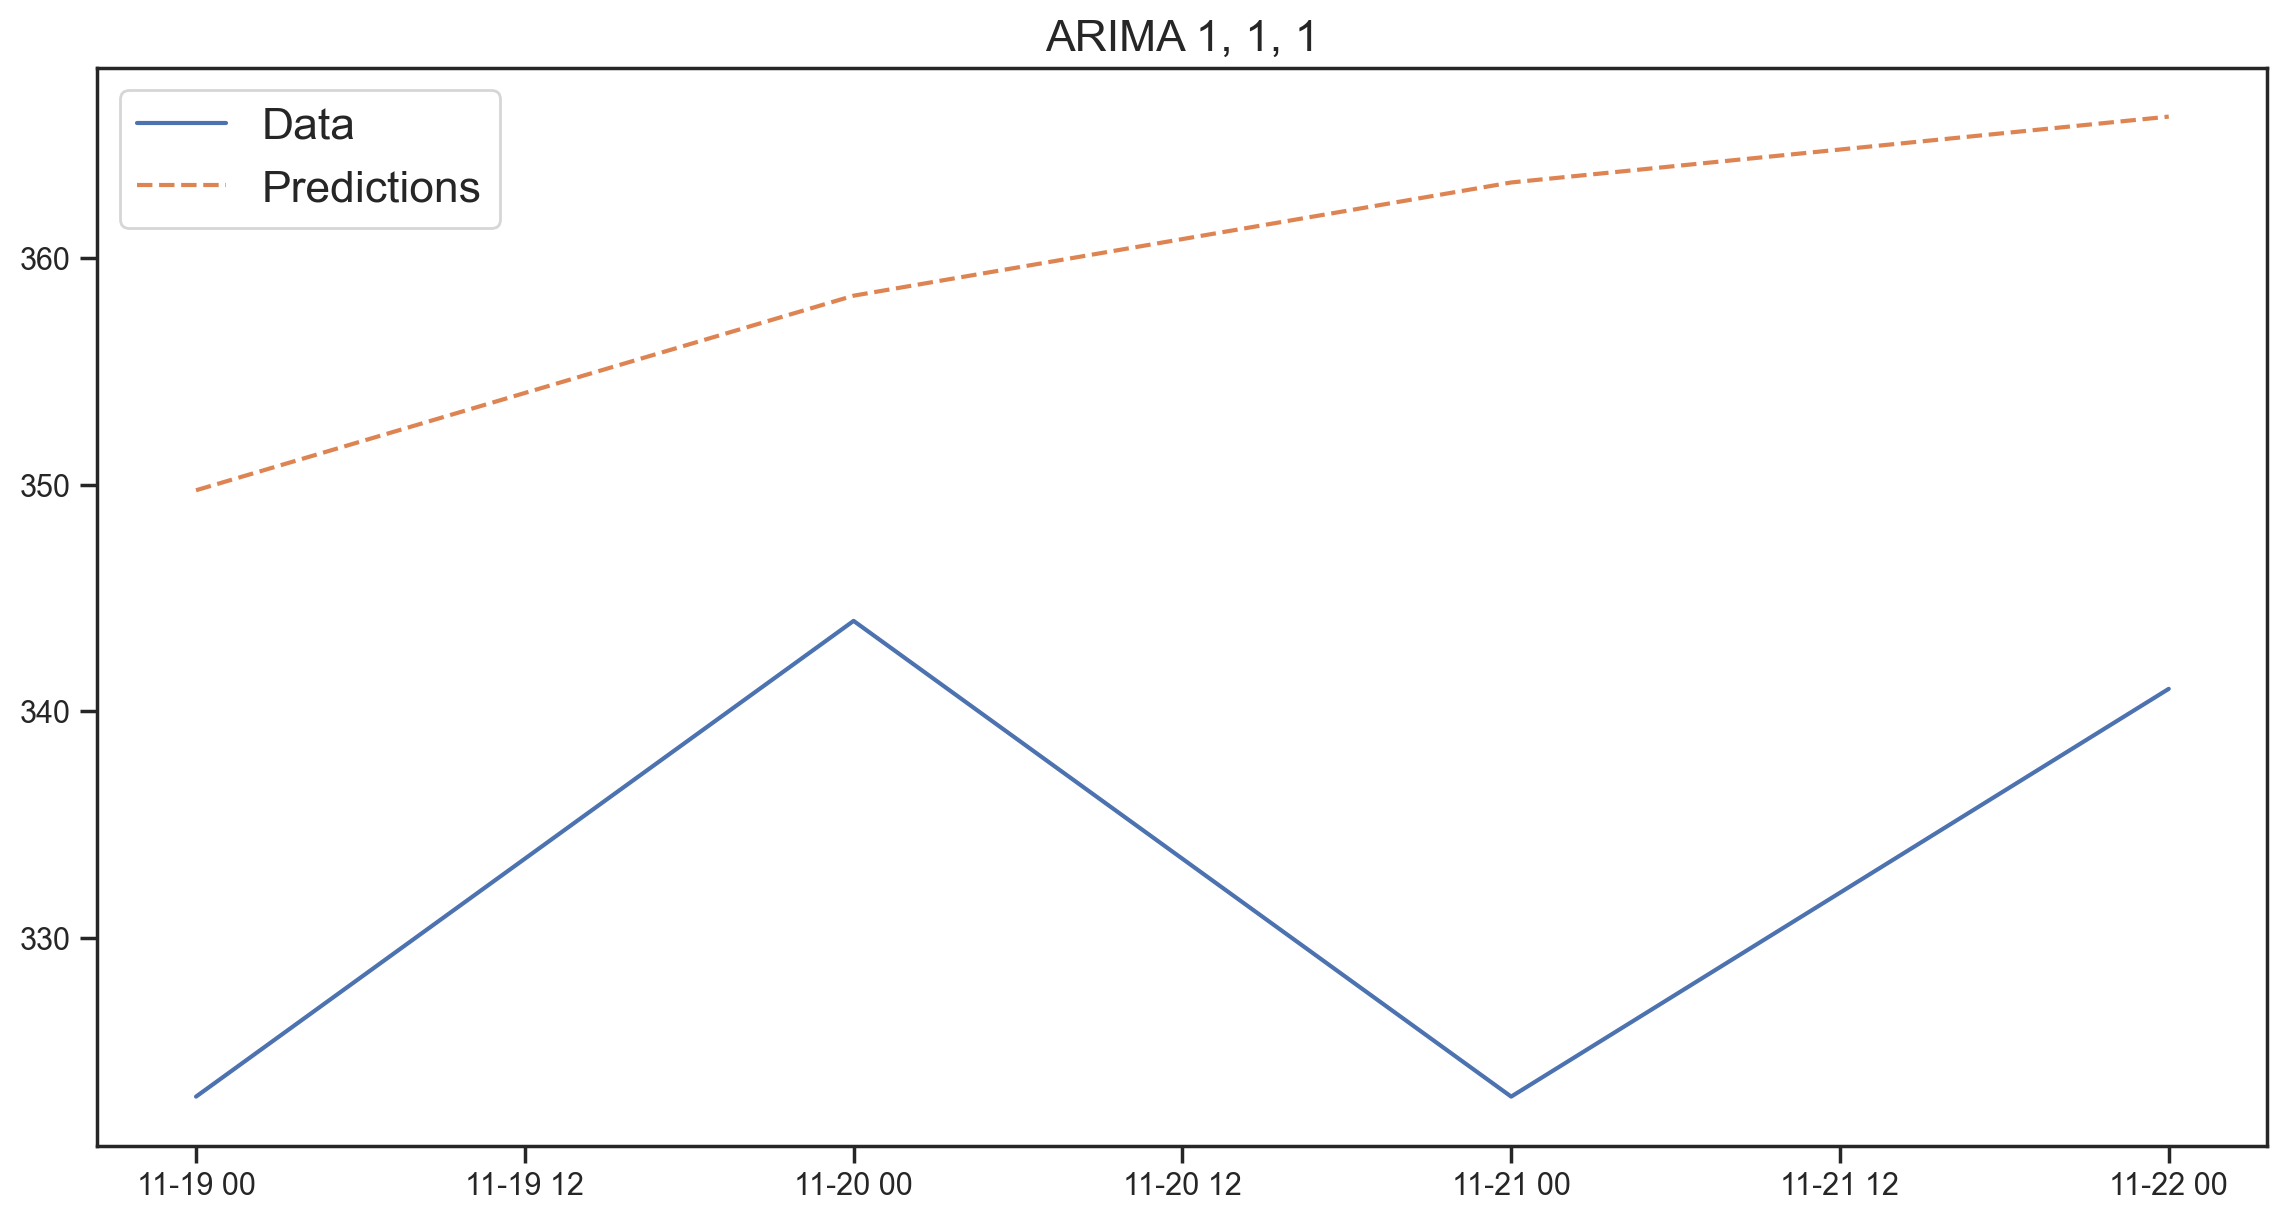

In [174]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(predictions, '--')
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title("ARIMA {}, {}, {}".format(p,d,q), fontsize=16)

#### 1.3.4.1 Another way

In [89]:
train_end = datetime(2023, 11, 18) # 4 days
test_end = datetime(2023, 11, 22)

train_data = sector_51.diff(1).dropna()[:train_end]['AQI']
test_data = sector_51.diff(1).dropna()[train_end + timedelta(days=1):test_end]['AQI']

p, d, q = (2, 0, 1)
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()
print("Model summary ", model_fit.summary())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Model summary                                 SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                 1353
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -7551.774
Date:                Fri, 24 Nov 2023   AIC                          15113.549
Time:                        22:26:15   BIC                          15139.599
Sample:                    03-06-2020   HQIC                         15123.303
                         - 11-18-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1870      0.434      0.431      0.666      -0.663       1.037
ar.L1          0.5871      0.027     21.819      0.000       0.534       0.640
ar.L2         -0.0368      0.024     

In [90]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
pred_start_date, pred_end_date

(Timestamp('2023-11-19 00:00:00'), Timestamp('2023-11-22 00:00:00'))

In [91]:
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

<Figure size 1400x400 with 0 Axes>

Text(0.5, 1.0, 'Residuals from ARIMA 201')

Text(0, 0.5, 'Error')

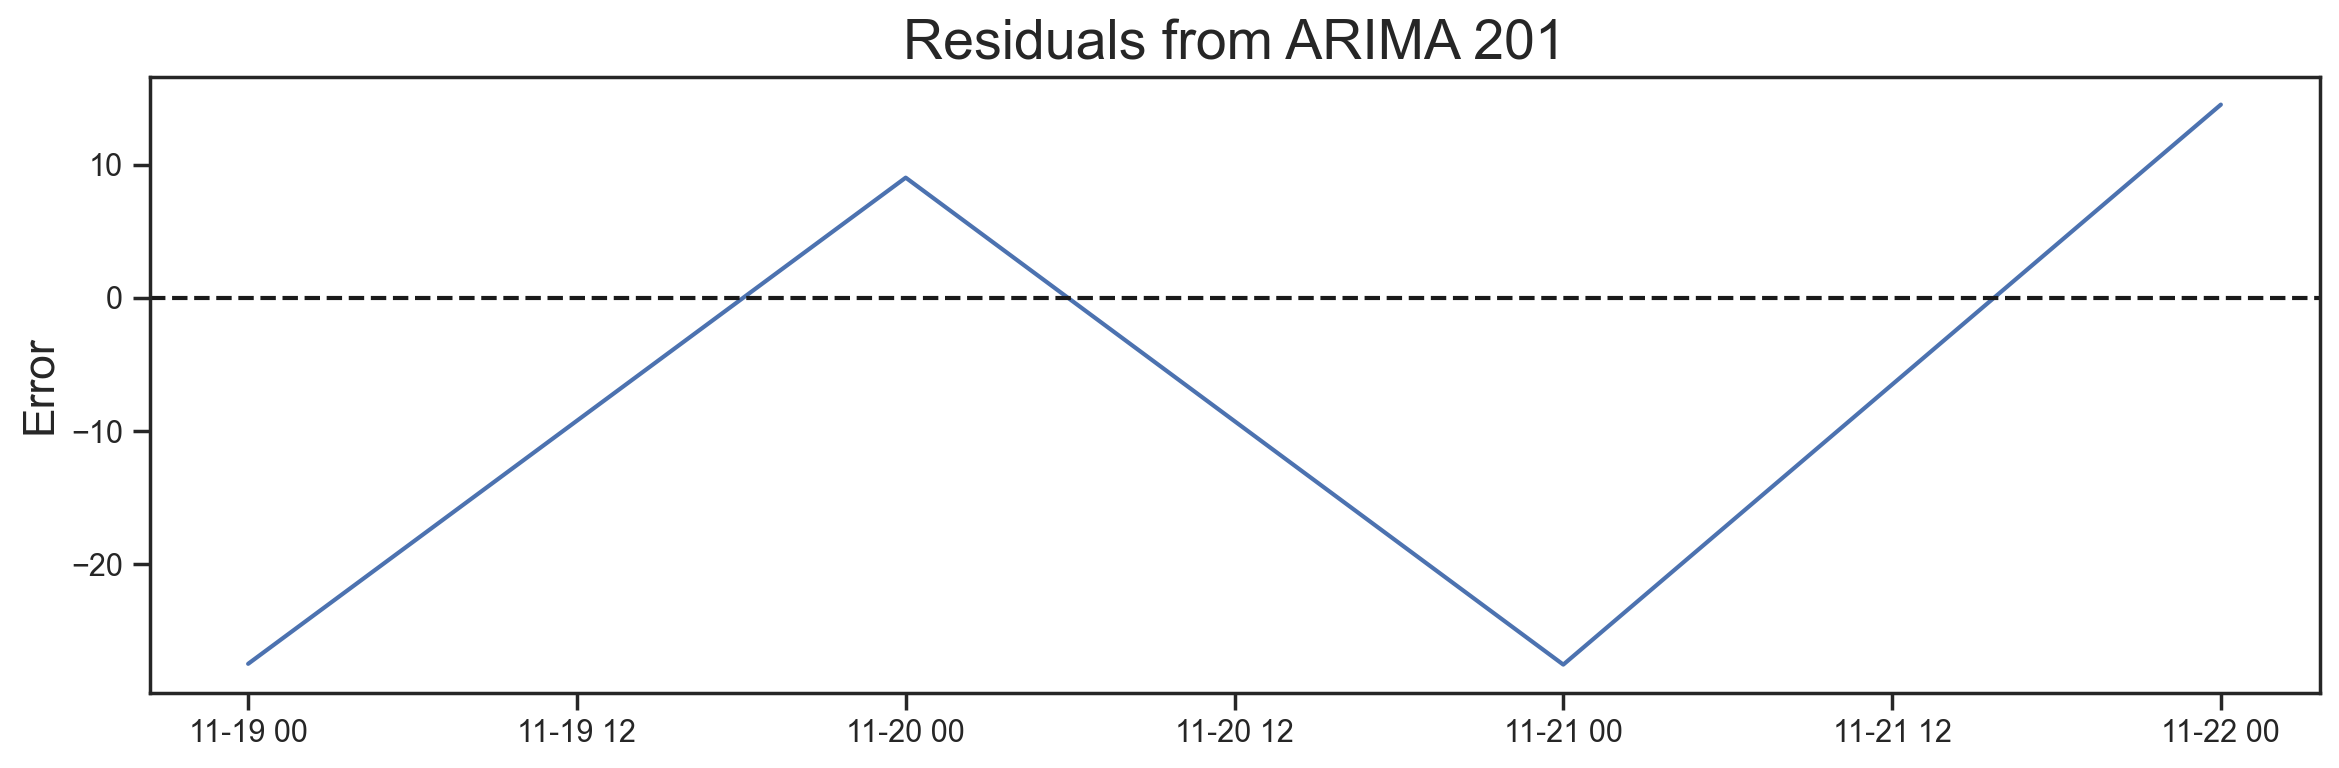

In [92]:
plt.figure(figsize=(14,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from ARIMA {}, {}, {} '.format(p,d,q), fontsize=20)
plt.ylabel('Error', fontsize=16)

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'ARIMA 201')

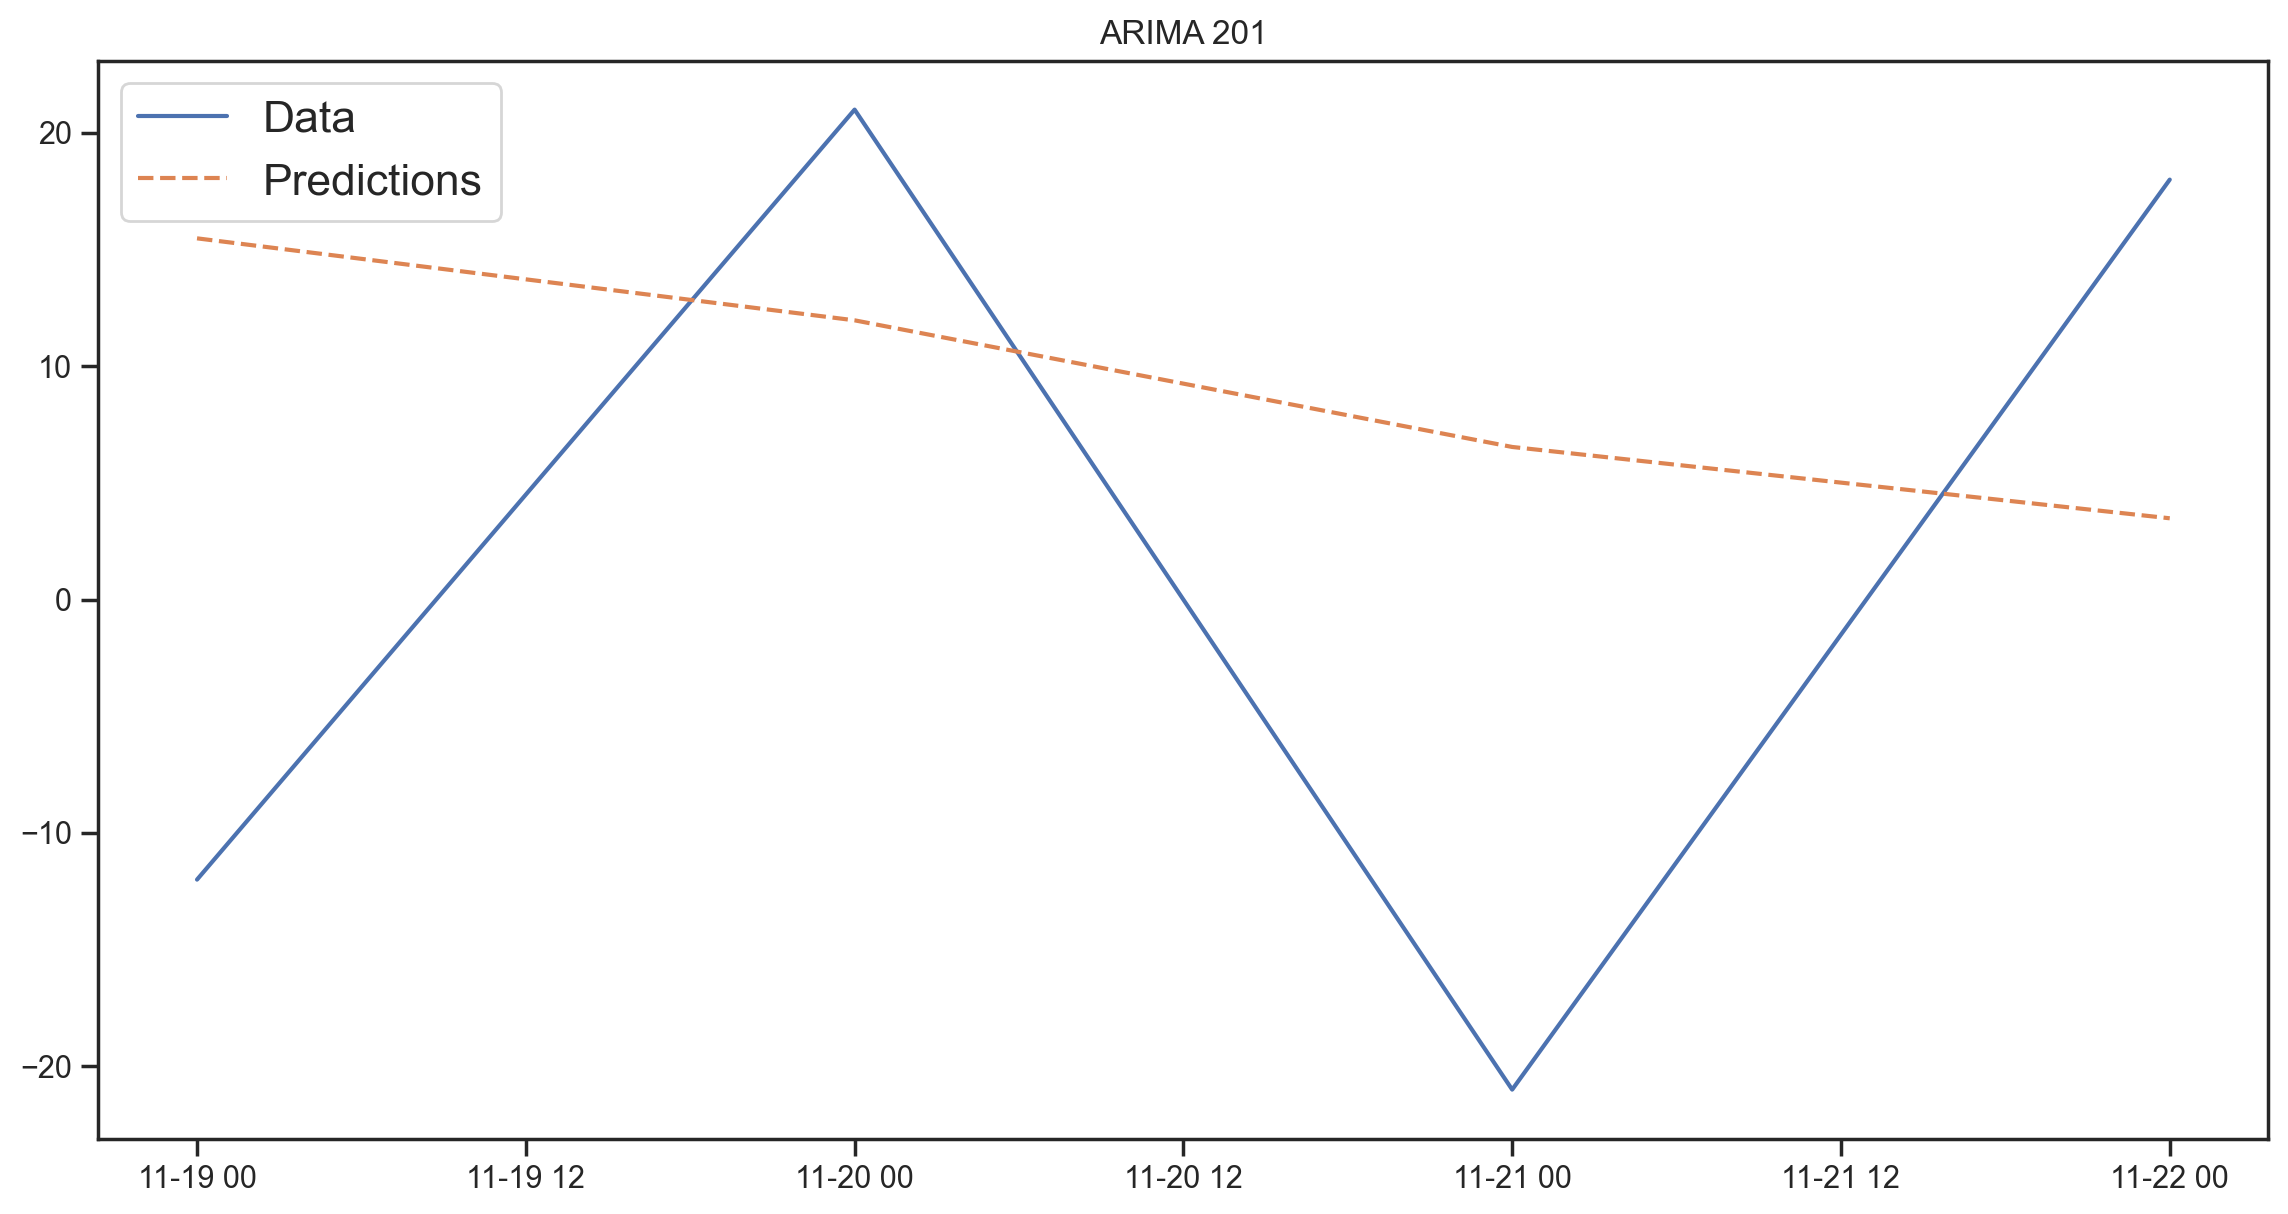

In [93]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(predictions, '--')
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title("ARIMA {}, {}, {}".format(p,d,q), fontsize=16)

In [94]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 21.249266848856724


In [95]:
result = {
    "p,d,q": (p, d, q),
    "MSE": np.sqrt(np.mean(residuals**2)),
    "Rolling?": False,
    "AIC": model_fit.aic
}
result

{'p,d,q': (2, 0, 1),
 'MSE': 21.249266848856724,
 'Rolling?': False,
 'AIC': 15113.548699323015}

In [96]:
results.add(result)
results

Empty DataFrame
Columns: [p,d,q, MSE, Rolling?, AIC]
Index: []

Empty DataFrame
Columns: [p,d,q, MSE, Rolling?, AIC]
Index: []

In [61]:
model_fit.aic 

15262.733941768549

# 1